<div style="font-size:16px; color:darkblue;">
    https://www.kaggle.com/jtrofe/beer-recipes
</div>

<div style="font-size:16px; color:darkblue;">
    BeerID - Record ID<br/>
    Name - Name<br/>
    URL - Location of recipe webpage at https://www.brewersfriend.com<br/>
    Style - Type of brew<br/>
    StyleID - Numeric ID for type of brew<br/>
    Size(L) - Amount brewed for recipe listed<br/>
    OG - Specific gravity of wort before fermentation<br/>
    FG - Specific gravity of wort after fermentation<br/>
    ABV - Alcohol By Volume<br/>
    IBU - International Bittering Units<br/>
    Color - Standard Reference Method - light to dark ex. 40 = black<br/>
    BoilSize - Fluid at beginning of boil<br/>
    BoilTime - Time wort is boiled<br/>
    BoilGravity - Specific gravity of wort before the boil<br/>
    Efficiency - Beer mash extraction efficiency - extracting sugars from the grain during mash<br/>
    MashThickness - Amount of water per pound of grain<br/>
    SugarScale - Scale to determine the concentration of dissolved solids in wort<br/>
    BrewMethod - Various techniques for brewing<br/>
    PitchRate - Yeast added to the fermentor per gravity unit - M cells/ml/deg P<br/>
    PrimaryTemp - Temperature at the fermenting stage<br/>
    PrimingMethod - Priming method used, e.g., corn sugar<br/>
    PrimingAmount - Amount of priming sugar used<br/>
    UserId
</div>

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import statsmodels.formula.api as sm
import scipy.stats as stats
import collections
import wordcloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

pylab.rcParams['figure.figsize'] = (10, 6)
pd.options.display.max_rows = 20
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\megha\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [257]:
!type recipeData.csv

ï»¿BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70,N/A,Specific Gravity,All Grain,N/A,17.78,corn sugar,4.5 oz,116
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumking-clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.07,70,N/A,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,955
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-extract,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,N/A,70,N/A,Specific Gravity,extract,N/A,N/A,N/A,N/A,
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-all-grain,American IPA,7,22.71,1.061,1.017,5.8,54.48,8.5,26.5,60,N/A,70,N/A,Specific Gravity,All Grain,N/A,N/A,N/A

2755,5 C's IPA,/homebrew/recipe/view/110769/5-c-s-ipa,American IPA,7,41.64,1.075,1.017,7.57,100.59,10.09,49.21,60,1.063,73,1.3,Specific Gravity,All Grain,1,20,Force Carb,12 psi,15241
2756,BLACK TEA IPA,/homebrew/recipe/view/260377/black-tea-ipa,American IPA,7,3.79,1.071,1.016,7.3,273.19,7.19,9.46,60,1.028,35,1.5,Specific Gravity,All Grain,0.5,18.89,Dextrose,0.92,
2757,Blue Certified Clone,/homebrew/recipe/view/93990/blue-certified-clone,Light American Lager,100,20.82,1.037,1.01,3.59,11.55,3.25,11.36,60,1.068,35,N/A,Specific Gravity,extract,N/A,15.56,N/A,N/A,21525
2758,Porter,/homebrew/recipe/view/13954/porter,Brown Porter,37,18.93,1.042,1.01,4.27,44.32,21.95,24.61,90,N/A,75,N/A,Specific Gravity,BIAB,N/A,N/A,N/A,N/A,1426
2759,Brewdog - Jack Hammer,/homebrew/recipe/view/374494/brewdog-jack-hammer,American Light Lager,9,20,1.064,1.01,7.13,132.72,5.13,25,60,1.052,70,2.5,Specific Gravity,All Grain,N/A,21,N/A,N/A,
2760,White House Honey Ale.7,/homebrew/recipe/view/221090/white-house-honey-al

5254,Baby Doc SIPA,/homebrew/recipe/view/164272/baby-doc-sipa,American IPA,7,20.82,1.042,1.012,3.97,84.95,3.63,28.39,60,1.031,69,N/A,Specific Gravity,All Grain,1,22.22,N/A,N/A,21274
5255,Central Coast Brewing - Monterey Pale Ale (G...,/homebrew/recipe/view/282312/central-coast-brewing-monterey-pale-ale-gold-gabf-2015-,American Pale Ale,10,20.82,1.056,1.014,5.46,48.93,6.38,28.39,60,1.041,70,1.3,Specific Gravity,All Grain,0.75,N/A,N/A,N/A,
5256,Stone Enjoy By double IPA,/homebrew/recipe/view/139315/stone-enjoy-by-double-ipa,American IPA,7,22.71,1.08,1.011,9.05,150.27,5.55,30.28,60,1.054,80,1.75,Specific Gravity,All Grain,1,15.56,N/A,N/A,5889
5257,Fun in the Sun,/homebrew/recipe/view/9036/fun-in-the-sun,Blonde Ale,30,22.71,1.044,1.012,4.18,16.87,3.44,26.5,60,N/A,80,N/A,Specific Gravity,All Grain,N/A,N/A,Dextrose,5 oz,402
5258,Biscuits and Honey Ale,/homebrew/recipe/view/85613/biscuits-and-honey-ale,American Pale Ale,10,20.82,1.06,1.017,5.64,48.86,10.59,11.36,45,1.109,70,N/A,Specific Gravi

7754,Belgian Blond Ale,/homebrew/recipe/view/217530/belgian-blond-ale,Belgian Blond Ale,20,13,1.054,1.011,5.6,41.64,6.81,16,60,1.044,75,N/A,Specific Gravity,BIAB,N/A,20,N/A,N/A,
7755,Spetakkel,/homebrew/recipe/view/90810/spetakkel,American Barleywine,5,22,1.104,1.025,10.48,87,21.43,28,120,1.082,70,N/A,Specific Gravity,All Grain,N/A,18,N/A,N/A,
7756,Front Porch - American Pale Ale2,/homebrew/recipe/view/24545/front-porch-american-pale-ale2,American Pale Ale,10,20.82,1.055,1.014,5.46,80.87,11.1,18.93,75,N/A,35,N/A,Specific Gravity,extract,N/A,N/A,N/A,N/A,
7757,Blonde Ale,/homebrew/recipe/view/42477/blonde-ale,Blonde Ale,30,20.82,1.048,1.012,4.72,22.73,4.26,13.25,60,N/A,35,N/A,Specific Gravity,extract,N/A,N/A,N/A,N/A,
7758,Itkin's Apple Cider,/homebrew/recipe/view/242157/itkin-s-apple-cider,Common Cider,44,20,1.055,1.02,4.57,0,2.45,20,0,1.055,100,N/A,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
7759,Brew #004 - ESB,/homebrew/recipe/view/138227/brew-004-esb,Extra Special/Strong Bitter (ESB)

9818,Bell's Two Hearted Ale Clone,/homebrew/recipe/view/146915/bell-s-two-hearted-ale-clone,American IPA,7,20.82,1.07,1.014,7.26,79.06,6.47,28.39,75,1.051,70,1.25,Specific Gravity,All Grain,0.75,20,N/A,N/A,
9819,Imperial Pilsner,/homebrew/recipe/view/445678/imperial-pilsner,Czech Premium Pale Lager,50,275,1.048,1.009,5.12,28.72,2.86,320,90,1.041,90,3,Specific Gravity,All Grain,2,10,N/A,N/A,
9820,#65 Weissbier 100% Wheat,/homebrew/recipe/view/326650/-65-weissbier-100-wheat,Weissbier,169,40,1.048,1.012,4.78,14.58,5.1,42,60,1.046,80,3,Specific Gravity,All Grain,N/A,17,N/A,N/A,
9821,Hefe-Cider,/homebrew/recipe/view/183807/hefe-cider,Common Cider,44,18.93,1.053,1.014,5.17,0,13.24,11.36,0,1.089,0,N/A,Specific Gravity,extract,N/A,18.33,N/A,N/A,22389
9822,143 American Ordinary bitter,/homebrew/recipe/view/232450/143-american-ordinary-bitter,Standard/Ordinary Bitter,157,22.71,1.041,1.01,4.09,35.39,10.41,28.39,60,1.033,75,N/A,Specific Gravity,All Grain,N/A,18.89,N/A,Keg with 10.89 PSI,20450
9823

11834,Scottish 80 Shilling,/homebrew/recipe/view/255512/scottish-80-shilling,Scottish Export 80/-,137,18.93,1.053,1.015,4.95,19.49,12.95,26.5,60,1.038,70,1.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,45429
11835,Plum Mead,/homebrew/recipe/view/345626/plum-mead,Other Fruit Melomel,119,7.57,1.141,1.035,13.86,0,5.1,7.57,0,1.141,90,1.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
11836,2 Dogs Tripel Extract,/homebrew/recipe/view/248090/2-dogs-tripel-extract,Belgian Tripel,26,4,1.095,1.026,9,22.23,6.4,5.5,60,1.069,70,N/A,Specific Gravity,Partial Mash,N/A,N/A,N/A,N/A,41902
11837,Learn2Brew IPA,/homebrew/recipe/view/80670/learn2brew-ipa,American IPA,7,21.77,1.06,1.014,6.03,80.33,5.55,28.39,60,1.046,80,N/A,Specific Gravity,BIAB,0.75,18.33,N/A,N/A,
11838,HNY14 IPA,/homebrew/recipe/view/94750/hny14-ipa,Imperial IPA,86,3.79,1.081,1.019,8.11,88.97,10.3,5.68,60,1.054,70,1.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
11839,Up ya bum - Australian pale ale,/homebrew/recipe/view/251679/up-ya-bum-austr

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



33748,Brads barrel project,/homebrew/recipe/view/279011/brads-barrel-project,Belgian Golden Strong Ale,23,41.64,1.07,1.017,6.95,36.52,6.2,51.48,90,1.056,68,1.5,Specific Gravity,All Grain,1,20,N/A,N/A,39670
33749,Tamara Best  #2,/homebrew/recipe/view/220902/tamara-best-2,Special/Best/Premium Bitter,144,28,1.044,1.011,4.31,40.88,7.27,37,60,1.033,71,3.64,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
33750,American Wheat,/homebrew/recipe/view/255719/american-wheat,American Wheat or Rye Beer,15,18.93,1.052,1.01,5.49,20.13,4.62,9.46,60,1.103,35,N/A,Specific Gravity,extract,N/A,N/A,N/A,N/A,
33751,Wedding Wheat,/homebrew/recipe/view/233705/wedding-wheat,American Wheat or Rye Beer,15,18.93,1.047,1.01,4.77,26.82,5.7,13.25,60,1.043,70,N/A,Specific Gravity,Partial Mash,N/A,16.67,N/A,N/A,
33752,Black Belgian Stout,/homebrew/recipe/view/304873/black-belgian-stout,American Light Lager,9,18.93,1.005,1.001,0.47,0,0.85,24.61,60,1.004,74,1.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
33753,DME Lambic,/hom

36247,IPA new mango base,/homebrew/recipe/view/373798/ipa-new-mango-base,American IPA,7,19,1.044,1.009,4.56,38.44,4.52,28.5,60,1.029,75,N/A,Specific Gravity,BIAB,0.75,18,N/A,N/A,
36248,California Lager,/homebrew/recipe/view/434728/california-lager,California Common,38,20.82,1.045,1.009,4.79,40.75,12.7,28.39,60,1.033,70,1.5,Specific Gravity,All Grain,1.5,12.78,N/A,N/A,
36249,Perley Czechman Pils,/homebrew/recipe/view/361260/perley-czechman-pils,Czech Premium Pale Lager,50,20.82,1.056,1.009,6.14,45.04,3.59,24.61,90,1.047,70,1.33,Specific Gravity,All Grain,1.5,8.89,force carb,N/A,
36250,Kissed by Fire,/homebrew/recipe/view/225326/kissed-by-fire,Blonde Ale,30,21.77,1.05,1.014,4.72,18.85,5.39,27.44,60,1.039,71,1.5,Specific Gravity,All Grain,N/A,20,N/A,N/A,
36251,G01 Blood Eagle - Viking Ale,/homebrew/recipe/view/518706/g01-blood-eagle-viking-ale,Sahti,133,49,1.064,1.022,5.49,0,16.19,54,60,1.058,79,2.5,Specific Gravity,All Grain,0.35,30,N/A,N/A,25019
36252,Awesome Recipe,/homebrew/recipe/vie

38559,Basic Berliner,/homebrew/recipe/view/428717/basic-berliner,American Light Lager,9,22.71,1.038,1.009,3.79,7.48,2.72,28.39,60,1.03,75,N/A,Specific Gravity,BIAB,N/A,N/A,N/A,N/A,43574
38560,Toasted Nut Brown,/homebrew/recipe/view/460462/toasted-nut-brown,British Brown Ale,34,20.82,1.048,1.013,4.53,33.92,19.95,11.36,60,1.088,35,N/A,Specific Gravity,extract,0.35,20,Dextrose,4oz,
38561,IPA Split Batch / DME,/homebrew/recipe/view/433838/ipa-split-batch-dme,American IPA,7,37.85,1.03,1.004,3.44,67.88,2.83,45.42,60,1.025,75,1.35,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
38562,Junkyard dec 2015,/homebrew/recipe/view/307887/junkyard-dec-2015,American Light Lager,9,37.85,1.054,1.013,5.31,0,26.01,45.42,60,1.045,70,N/A,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
38563,Hop bomb red ale,/homebrew/recipe/view/466352/hop-bomb-red-ale,Specialty IPA: Red IPA,150,20.82,1.054,1.01,5.79,49.73,13.6,9.46,60,1.12,35,N/A,Specific Gravity,extract,0.5,21.11,Corn sugar,5oz,
38564,J.T. Brew II,/homebrew/recipe

40746,Awesome Recipe,/homebrew/recipe/view/206941/awesome-recipe,American Pale Ale,10,20.82,1.055,1.015,5.21,36.9,9.2,28.39,60,1.04,75,N/A,Specific Gravity,All Grain,0.35,21.11,N/A,N/A,
40747,Delicioso IPA,/homebrew/recipe/view/492895/delicioso-ipa,American IPA,7,41.64,1.07,1.023,6.26,184.63,4.82,49.21,90,1.059,75,1.25,Specific Gravity,All Grain,N/A,18.33,N/A,N/A,40395
40748,Handsome Hog,/homebrew/recipe/view/511839/handsome-hog,American IPA,7,20,1.078,1.02,7.56,78.67,7.8,26,60,1.06,80,N/A,Specific Gravity,All Grain,N/A,20,N/A,N/A,
40749,Canned Starter Recipe,/homebrew/recipe/view/299616/canned-starter-recipe,American Light Lager,9,5.68,1.151,1.148,0.54,0,7.49,6.81,15,1.126,70,1.25,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
40750,Wiregrass Saison,/homebrew/recipe/view/380000/wiregrass-saison,Belgian Pale Ale,24,20.82,1.068,1.021,6.28,84.99,5.92,26.5,75,1.054,60,1.5,Specific Gravity,All Grain,0.5,20,N/A,N/A,46849
40751,Plimouth Pale Ale,/homebrew/recipe/view/328289/plimouth-pale-ale,Am

43246,One Pounder IPA,/homebrew/recipe/view/366893/one-pounder-ipa,Double IPA,56,20.82,1.07,1.012,7.68,86.41,6.56,24.61,60,1.06,75,1.4,Specific Gravity,All Grain,0.75,18.33,N/A,N/A,
43247,Pumpkin Ale,/homebrew/recipe/view/400687/pumpkin-ale,Autumn Seasonal Beer,18,20.82,1.049,1.01,5.14,24.28,5.86,23.66,30,1.043,60,2.8,Specific Gravity,All Grain,0.35,21.11,N/A,N/A,
43248,Cal Common 1,/homebrew/recipe/view/227887/cal-common-1,California Common Beer,39,22.71,1.057,1.018,5.15,35.22,12.46,25.36,60,1.051,72,1.25,Specific Gravity,All Grain,0.35,18.89,N/A,N/A,
43249,Op.10 New Year Eve Brown IPA,/homebrew/recipe/view/428592/op-10-new-year-eve-brown-ipa,Specialty IPA: Brown IPA,149,22.5,15.0867,3.91956,6.05,58.1,10.97,37,90,9.4,70,3,Plato,All Grain,N/A,N/A,N/A,N/A,67874
43250,Steam IPA,/homebrew/recipe/view/307506/steam-ipa,American Light Lager,9,20.82,1.068,1.021,6.11,105.1,14.34,28.39,60,1.05,70,1.5,Specific Gravity,All Grain,N/A,18.33,N/A,N/A,
43251,Belgain Pale Ale,/homebrew/recipe/view/4465

45245,Nice Try English Pale Ale,/homebrew/recipe/view/381804/nice-try-english-pale-ale,Standard/Ordinary Bitter,157,20.82,1.046,1.008,4.99,19.24,4.96,28.39,60,1.034,78,1.25,Specific Gravity,All Grain,1.25,18.89,N/A,N/A,
45246,Session for the Bees,/homebrew/recipe/view/249710/session-for-the-bees,Saison,134,41.64,1.052,1.011,5.3,7.34,6.42,53,60,1.041,65,1.5,Specific Gravity,All Grain,0.35,25.56,N/A,N/A,
45247,Radio Active IPA,/homebrew/recipe/view/319857/radio-active-ipa,American IPA,7,20.82,1.074,1.021,6.9,83.76,8.5,28.39,60,1.054,70,1.5,Specific Gravity,All Grain,2,20,N/A,N/A,
45248,Berliner Weisse,/homebrew/recipe/view/460146/berliner-weisse,Berliner Weisse,27,21,1.036,1.006,3.86,36.8,2.63,21,15,1.036,75,3.5,Specific Gravity,All Grain,0.35,10,N/A,N/A,
45249,Black IPA,/homebrew/recipe/view/417138/black-ipa,Specialty IPA: Black IPA,148,68.14,1.057,1.011,6.06,117.45,31.11,90.85,60,1.043,55,1.5,Specific Gravity,All Grain,N/A,23.89,N/A,N/A,
45250,Chocolate Stout,/homebrew/recipe/view/3385

47245,Ruthless (clone),/homebrew/recipe/view/488721/ruthless-clone-,Specialty IPA: Rye IPA,151,7,1.063,1.013,6.61,66.86,9.89,10.9,90,1.04,80,N/A,Specific Gravity,BIAB,N/A,16.7,N/A,N/A,86665
47246,Berliner Weisse II,/homebrew/recipe/view/407826/berliner-weisse-ii,Berliner Weisse,27,20.82,1.048,1.008,5.21,3.95,3.98,26.5,60,1.037,68,2.33,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
47247,Lawson's Double Sunshine,/homebrew/recipe/view/506642/lawson-s-double-sunshine,Imperial IPA,86,20.82,1.074,1.013,8.1,126.63,8.23,26.5,60,1.058,70,N/A,Specific Gravity,BIAB,N/A,18.89,N/A,N/A,
47248,20C1: Imperial Stout #1,/homebrew/recipe/view/534292/20c1-imperial-stout-1,Imperial Stout,87,20.82,1.109,1.024,11.15,106.54,36.86,28.39,60,1.08,72,1.5,Specific Gravity,All Grain,1.25,21.11,N/A,N/A,
47249,Grisette Test #2,/homebrew/recipe/view/414485/grisette-test-2,Saison,134,41.64,1.042,1.008,4.5,21.85,6.82,49.21,60,1.036,75,1,Specific Gravity,All Grain,N/A,20,N/A,N/A,
47250,Pilsner,/homebrew/recipe/view/139035/

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



63241,GrÃ¸ftejul,/homebrew/recipe/view/558521/,Wee Heavy,168,26,1.089,1.019,9.97,23.82,23.17,30,60,1.077,79,N/A,Specific Gravity,BIAB,N/A,18,N/A,N/A,
63242,Norther Brewer Centennial SMaSH IPA,/homebrew/recipe/view/586426/norther-brewer-centennial-smash-ipa,American IPA,7,3.79,1.095,1.018,10.05,66.68,4.5,3.79,60,1.095,35,N/A,Specific Gravity,extract,0.35,18.33,N/A,N/A,
63243,CenTex Gose,/homebrew/recipe/view/525756/centex-gose,Berliner Weisse,27,26.5,1.051,1.013,4.98,10.17,7.25,34.07,60,1.039,73,1.25,Specific Gravity,All Grain,0.35,18.33,N/A,N/A,2568
63244,Encore,/homebrew/recipe/view/529597/encore,Double IPA,56,14,1.07,1.013,7.41,78.89,5.08,20,60,1.049,65,N/A,Specific Gravity,BIAB,N/A,N/A,N/A,N/A,
63245,Brown Ale from Northern Brewer  (CaribSlobbe...,/homebrew/recipe/view/475069/brown-ale-from-northern-brewer-caribslobber-,British Brown Ale,34,20.82,1.054,1.02,4.52,26.71,17.83,11.36,60,1.099,75,N/A,Specific Gravity,Partial Mash,N/A,N/A,Dextrose,5 oz,
63246,The Blue Thing,/homebrew/reci

65240,Paul's Painfully Perfect Pilsner,/homebrew/recipe/view/557690/paul-s-painfully-perfect-pilsner,Czech Premium Pale Lager,50,18.93,1.046,1.008,5.03,33.33,2.9,28.39,60,1.031,70,1.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
65241,American Pils,/homebrew/recipe/view/560506/american-pils,German Pils,80,20,12.5038,1.9216,5.64,24.05,4.32,15,60,16.4,55,2,Plato,All Grain,N/A,15,N/A,N/A,
65242,Hoppy Saison #2 10gal.,/homebrew/recipe/view/531838/hoppy-saison-2-10gal-,Saison,134,39.75,1.062,1.004,7.72,31.57,5.03,43.53,60,1.057,65,1.25,Specific Gravity,All Grain,1,22.22,N/A,N/A,20687
65243,Misunderstood,/homebrew/recipe/view/413055/misunderstood,MÃ¤rzen,102,18.93,1.06,1.016,5.68,21.35,12.52,25.1,60,1.045,70,1.25,Specific Gravity,All Grain,0.35,15.56,N/A,N/A,
65244,DoCo Cherry Saison,/homebrew/recipe/view/547971/doco-cherry-saison,Saison,134,18.93,1.059,1.01,6.42,21.97,8.92,26.5,90,1.042,70,1.75,Specific Gravity,All Grain,0.75,N/A,N/A,N/A,
65245,ImpStour,/homebrew/recipe/view/526468/impstour,

67240,Lip Gloss,/homebrew/recipe/view/534117/lip-gloss,Fruit Beer,75,5,1.052,1.007,5.81,17.16,5.25,8,60,1.032,60,N/A,Specific Gravity,BIAB,N/A,N/A,N/A,N/A,88140
67241,#48 Sour Solera Project #1 - Extract Lambic ...,/homebrew/recipe/view/587114/-48-sour-solera-project-1-extract-lambic-6-gallon,Straight (Unblended) Lambic,158,22.71,1.045,1.005,5.24,1.92,2.8,9.46,30,1.101,100,N/A,Specific Gravity,extract,N/A,21.11,N/A,N/A,
67242,Belgium Double,/homebrew/recipe/view/587883/belgium-double,Belgian Blond Ale,20,16,1.064,1.017,6.21,22.9,8.78,20,60,1.051,58,3,Specific Gravity,All Grain,0.75,23,N/A,N/A,
67243,Honey Brown,/homebrew/recipe/view/578925/honey-brown,American Brown Ale,6,18.93,1.054,1.011,5.6,12.32,24.47,24.61,60,1.041,70,1.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
67244,Marius Brown Ale,/homebrew/recipe/view/562798/marius-brown-ale,American Brown Ale,6,20,1.049,1.009,5.22,43.18,18.26,28.5,60,1.034,67,3.1,Specific Gravity,All Grain,0.35,18,N/A,N/A,
67245,Brown Bear Ale,/homebrew/r

69239,Buzzblasters Pale Ale,/homebrew/recipe/view/584370/buzzblasters-pale-ale,Special/Best/Premium Bitter,144,20.82,1.053,1.009,5.83,95.57,8.01,26.5,60,1.042,73,1.33,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,49884
69240,Amber Pale Ale,/homebrew/recipe/view/598963/amber-pale-ale,American Amber Ale,4,41.64,1.057,1.014,5.63,65.11,9.99,47.32,60,1.05,75,1.25,Specific Gravity,All Grain,N/A,18.33,N/A,N/A,
69241,Jon's Leffe Clone,/homebrew/recipe/view/582580/jon-s-leffe-clone,Belgian Pale Ale,24,21,1.063,1.015,6.34,20.65,8.97,28.5,60,1.047,65,2.6,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,117830
69242,1/2bbl Honey Belgo,/homebrew/recipe/view/577206/1-2bbl-honey-belgo,Specialty IPA: Belgian IPA,147,56.78,1.071,1.012,7.72,33.94,7.36,64.35,60,1.059,70,1.25,Specific Gravity,All Grain,N/A,18.89,N/A,N/A,
69243,Woodland Wheat,/homebrew/recipe/view/583094/woodland-wheat,American Wheat Beer,14,11.36,1.054,1.013,5.28,26.96,3.8,17.03,60,1.036,70,N/A,Specific Gravity,BIAB,N/A,18.33,N/A,N/A,
69244,Kjells

71239,Honey KÃ¶lsch,/homebrew/recipe/view/585131/,KÃ¶lsch,94,19.68,1.049,1.009,5.25,22.2,4.16,24.61,60,1.033,72,1.5,Specific Gravity,All Grain,0.5,18.33,N/A,N/A,108714
71240,American Pale Ale 2 (Extract),/homebrew/recipe/view/585900/american-pale-ale-2-extract-,American Pale Ale,10,20.82,1.058,1.014,5.86,59.53,7.24,22.71,60,1.053,35,N/A,Specific Gravity,extract,0.5,21.11,N/A,N/A,
71241,LAMBIC,/homebrew/recipe/view/584365/lambic,Fruit Lambic,77,20.82,1.06,1.015,5.88,0,4.17,28.39,60,1.044,70,N/A,Specific Gravity,BIAB,0.75,21.11,N/A,N/A,
71242,Skeezy IPA,/homebrew/recipe/view/614577/skeezy-ipa,American IPA,7,18.93,1.055,1.014,5.46,137.65,11.08,24.61,60,1.043,75,1.4,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
71243,Stout,/homebrew/recipe/view/590258/stout,Oatmeal Stout,114,18.93,1.054,1.015,5.05,42.61,25,11.36,60,1.048,35,N/A,Specific Gravity,Partial Mash,N/A,N/A,N/A,N/A,
71244,Golden Arrow,/homebrew/recipe/view/612275/golden-arrow,Best Bitter,28,8,1.045,1.01,4.59,30.3,8.31,12.5,60,1.018,3

73238,Trumpetpilz,/homebrew/recipe/view/615393/trumpetpilz,Classic American Pilsner,40,20,1.057,1.013,5.78,38.71,5.63,25,60,1.046,58,3,Specific Gravity,All Grain,N/A,10,N/A,N/A,
73239,Jimmy's Jinger Snaps,/homebrew/recipe/view/613346/jimmy-s-jinger-snaps,American Brown Ale,6,4.73,1.055,1.013,5.5,23.6,21.75,9.46,60,1.027,70,N/A,Specific Gravity,BIAB,N/A,N/A,N/A,N/A,
73240,50l American pale,/homebrew/recipe/view/613602/50l-american-pale,American Light Lager,9,45,1.043,1.011,4.22,25.44,3.25,40,60,1.048,75,3,Specific Gravity,All Grain,N/A,20,N/A,N/A,
73241,CouCouNUT Amber,/homebrew/recipe/view/620002/coucounut-amber,American Light Lager,9,600,1.081,1.021,7.92,25.46,15.5,700,90,1.069,75,3,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
73242,French Saison,/homebrew/recipe/view/620003/french-saison,Saison,134,18.93,1.049,1.014,4.63,70.49,3.11,28.39,90,1.033,75,1.33,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,75087
73243,Coppersmith IPA,/homebrew/recipe/view/615909/coppersmith-ipa,American IPA,7,2

In [258]:
df = pd.read_csv ('recipeData.csv')
df

BeerID                                          Name  \
0           1                             Vanilla Cream Ale   
1           2                   Southern Tier Pumking clone   
2           3                   Zombie Dust Clone - EXTRACT   
3           4                 Zombie Dust Clone - ALL GRAIN   
4           5               Bakke Brygg Belgisk Blonde 50 l   
5           6                  Sierra Nevada Pale Ale Clone   
6           7      Russian River Pliny the Elder (original)   
7           8  Spotted Clown (New Glarus Spotted Cow clone)   
8           9                      Chocolate Vanilla Porter   
9          10                            Mango Habanero IPA   
...       ...                                           ...   
73851   73852                                  Blonde Stout   
73852   73853                                Session Simcoe   
73853   73854                          Chris ford wheat ipa   
73854   73855                          X Files American Ale   
73855   73856                                   Unicorn Pee   
73856   73857                                 Amber Alfie 2   
73857   73858                                       Rye IPA   
73858   73859                                     SK-Kölsch   
73859   73860                               Flata Rødkløver   
73860   73861                         Elvis Juice IPA Clone   

                                                     URL  \
0           /homebrew/recipe/view/1633/vanilla-cream-ale   
1      /homebrew/recipe/view/16367/southern-tier-pumk...   
2      /homebrew/recipe/view/5920/zombie-dust-clone-e...   
3      /homebrew/recipe/view/5916/zombie-dust-clone-a...   
4      /homebrew/recipe/view/89534/bakke-brygg-belgis...   
5      /homebrew/recipe/view/28546/sierra-nevada-pale...   
6      /homebrew/recipe/view/37534/russian-river-plin...   
7      /homebrew/recipe/view/672/spotted-clown-new-gl...   
8      /homebrew/recipe/view/29265/chocolate-vanilla-...   
9         /homebrew/recipe/view/61082/mango-habanero-ipa   
...                                                  ...   
73851          /homebrew/recipe/view/615556/blonde-stout   
73852        /homebrew/recipe/view/618629/session-simcoe   
73853  /homebrew/recipe/view/602248/chris-ford-wheat-ipa   
73854  /homebrew/recipe/view/603016/x-files-american-ale   
73855           /homebrew/recipe/view/607368/unicorn-pee   
73856         /homebrew/recipe/view/609673/amber-alfie-2   
73857               /homebrew/recipe/view/610955/rye-ipa   
73858                      /homebrew/recipe/view/586891/   
73859                      /homebrew/recipe/view/603788/   
73860  /homebrew/recipe/view/613776/elvis-juice-ipa-c...   

                                    Style  StyleID  Size(L)     OG     FG  \
0                               Cream Ale       45    21.77  1.055  1.013   
1      Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021   
2                            American IPA        7    18.93  1.063  1.018   
3                            American IPA        7    22.71  1.061  1.017   
4                       Belgian Blond Ale       20    50.00  1.060  1.010   
5                       American Pale Ale       10    24.61  1.055  1.013   
6                            Imperial IPA       86    22.71  1.072  1.018   
7                               Cream Ale       45    20.82  1.054  1.014   
8                           Robust Porter      129    22.71  1.060  1.016   
9                            Imperial IPA       86    20.82  1.080  1.017   
...                                   ...      ...      ...    ...    ...   
73851                   Experimental Beer       67    20.82  1.076  1.021   
73852                   American Pale Ale       10    21.00  1.038  1.008   
73853                        American IPA        7    18.93  1.073  1.018   
73854                   American Pale Ale       10    18.93  1.064  1.016   
73855                        American IPA        7    22.71  1.065 

In [259]:
df.columns

Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG',
       'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
       'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate',
       'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')

In [260]:
df.shape

(73861, 23)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
BeerID           73861 non-null int64
Name             73860 non-null object
URL              73861 non-null object
Style            73265 non-null object
StyleID          73861 non-null int64
Size(L)          73861 non-null float64
OG               73861 non-null float64
FG               73861 non-null float64
ABV              73861 non-null float64
IBU              73861 non-null float64
Color            73861 non-null float64
BoilSize         73861 non-null float64
BoilTime         73861 non-null int64
BoilGravity      70871 non-null float64
Efficiency       73861 non-null float64
MashThickness    43997 non-null float64
SugarScale       73861 non-null object
BrewMethod       73861 non-null object
PitchRate        34609 non-null float64
PrimaryTemp      51199 non-null float64
PrimingMethod    6766 non-null object
PrimingAmount    4774 non-null object
UserId           23371 non

In [262]:
df.describe()

BeerID       StyleID       Size(L)            OG            FG  \
count  73861.000000  73861.000000  73861.000000  73861.000000  73861.000000   
mean   36931.000000     60.179432     43.929775      1.406266      1.075865   
std    21321.978453     56.811462    180.373492      2.196908      0.432524   
min        1.000000      1.000000      1.000000      1.000000     -0.003000   
25%    18466.000000     10.000000     18.930000      1.051000      1.011000   
50%    36931.000000     35.000000     20.820000      1.058000      1.013000   
75%    55396.000000    111.000000     23.660000      1.069000      1.017000   
max    73861.000000    176.000000   9200.000000     34.034500     23.424600   

                ABV           IBU         Color      BoilSize      BoilTime  \
count  73861.000000  73861.000000  73861.000000  73861.000000  73861.000000   
mean       6.136865     44.276186     13.404989     49.724919     65.074870   
std        1.883510     42.945508     11.944511    193.246427     15.024228   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%        5.080000     23.370000      5.170000     20.820000     60.000000   
50%        5.790000     35.770000      8.440000     27.440000     60.000000   
75%        6.830000     56.380000     16.790000     30.000000     60.000000   
max       54.720000   3409.300000    186.000000   9700.000000    240.000000   

        BoilGravity    Efficiency  MashThickness     PitchRate   PrimaryTemp  \
count  70871.000000  73861.000000   43997.000000  34609.000000  51199.000000   
mean       1.353955     66.354881       2.127235      0.750468     19.175641   
std        1.930989     14.091686       1.682347      0.394262      4.219676   
min        0.000000      0.000000       0.000000      0.000000    -17.780000   
25%        1.040000     65.000000       1.500000      0.350000     18.000000   
50%        1.047000     70.000000       1.500000      0.750000     20.000000   
75%        1.060000     75.000000       3.000000      1.000000     20.000000   
max       52.600000    100.000000     100.000000      2.000000    114.000000   

              UserId  
count   23371.000000  
mean    43078.069188  
std     27734.252556  
min        49.000000  
25%     20984.000000  
50%     42897.000000  
75%     57841.000000  
max    134362.000000

<div style="font-size:16px; color:darkblue;">
    This is a dataset of 75,000 homebrewed beers with over 176 different styles.<br/>
    Beer records are user-reported and are classified according to one of the 176 different styles.<br/>
    These recipes go into as much or as little detail as the user provided, but there's are least 
    5 useful columns where data was entered for each: Original Gravity, Final Gravity, ABV, IBU, 
    and Color
</div>

<div style="font-size:16px; color:darkblue;">
    What goes into homemade beer?<br/>
    It would be interesting to see if the data provided is enough to define each class or if there 
    are undiscovered patterns. In the future it might be possible to go through and scrape more 
    detailed information for each recipe, such as the yeast and specific hops used.
</div>

In [263]:
df = df.drop('URL', axis=1)

In [264]:
df = df.drop('BeerID', axis=1)

In [265]:
df = df.drop('UserId', axis=1)

In [266]:
df

Name  \
0                                 Vanilla Cream Ale   
1                       Southern Tier Pumking clone   
2                       Zombie Dust Clone - EXTRACT   
3                     Zombie Dust Clone - ALL GRAIN   
4                   Bakke Brygg Belgisk Blonde 50 l   
5                      Sierra Nevada Pale Ale Clone   
6          Russian River Pliny the Elder (original)   
7      Spotted Clown (New Glarus Spotted Cow clone)   
8                          Chocolate Vanilla Porter   
9                                Mango Habanero IPA   
...                                             ...   
73851                                  Blonde Stout   
73852                                Session Simcoe   
73853                          Chris ford wheat ipa   
73854                          X Files American Ale   
73855                                   Unicorn Pee   
73856                                 Amber Alfie 2   
73857                                       Rye IPA   
73858                                     SK-Kölsch   
73859                               Flata Rødkløver   
73860                         Elvis Juice IPA Clone   

                                    Style  StyleID  Size(L)     OG     FG  \
0                               Cream Ale       45    21.77  1.055  1.013   
1      Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021   
2                            American IPA        7    18.93  1.063  1.018   
3                            American IPA        7    22.71  1.061  1.017   
4                       Belgian Blond Ale       20    50.00  1.060  1.010   
5                       American Pale Ale       10    24.61  1.055  1.013   
6                            Imperial IPA       86    22.71  1.072  1.018   
7                               Cream Ale       45    20.82  1.054  1.014   
8                           Robust Porter      129    22.71  1.060  1.016   
9                            Imperial IPA       86    20.82  1.080  1.017   
...                                   ...      ...      ...    ...    ...   
73851                   Experimental Beer       67    20.82  1.076  1.021   
73852                   American Pale Ale       10    21.00  1.038  1.008   
73853                        American IPA        7    18.93  1.073  1.018   
73854                   American Pale Ale       10    18.93  1.064  1.016   
73855                        American IPA        7    22.71  1.065  1.014   
73856                  British Strong Ale       36    21.00  1.052  1.012   
73857              Specialty IPA: Rye IPA      151    10.00  1.059  1.010   
73858                                 NaN      111    16.00  1.046  1.008   
73859                       Irish Red Ale       92    24.00  1.051  1.014   
73860                        American IPA        7    20.00  1.060  1.010   

        ABV     IBU  Color  BoilSize  BoilTime  BoilGravity  Efficiency  \
0      5.48   17.65   4.83     28.39        75        1.038        70.0   
1      8.16   60.65  15.64     24.61        60        1.070        70.0   
2      5.91   59.25   8.98     22.71        60          NaN        70.0   
3      5.80   54.48   8.50     26.50        60          NaN        70.0   
4      6.48   17.84   4.57     60.00        90        1.050        72.0   
5      5.58   40.12   8.00     29.34        70        1.047        79.0   
6      7.09  268.71   6.33     30.28        90          NaN        75.0   
7      5.36   19.97   5.94     28.39        75        1.040        70.0   
8      5.77   31.63  34.76     30.28        75        1.042        73.0   
9      8.22   93.02   8.29     28.39        60        1.058        70.0   
...     ...     ...    ...       ...       ...          ...         ...   
73851  7.24   52.94   7.25     15.14        60        1.105        75.0   
73852  4.05   36.60  10.04     28.50        60        1.028        70.0   
73853  7.15    0.00   6.01     22.71        60        1.060        70.0   
73854  6.26    0

In [267]:
df.isnull().sum()

Name                 1
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
dtype: int64

In [268]:
df.loc[df['Style'].isnull()]

Name Style  StyleID  \
38                                   Rochefort 8 Clone   NaN      111   
87     Zatarain's Root Beer - Non-Alcoholic  keg in...   NaN      111   
192                                          Hop Cliff   NaN      111   
347                                         Mosaic IPL   NaN      111   
577                                        Nanny state   NaN      111   
816              New world XII (westvleteren 12 clone)   NaN      111   
944                                     Australian IPA   NaN      111   
1002                                 Maris Otter sMasH   NaN      111   
1107                       Quilter's Irish Death Clone   NaN      111   
1178                                           Heimeøl   NaN      111   
...                                                ...   ...      ...   
72863                                      Yellow rose   NaN      111   
72887                                           Deneme   NaN      111   
72938                                             Bass   NaN      111   
72954                                  Amber Christmas   NaN      111   
73354                             Pennsylvania Swankey   NaN      111   
73413                                    Summer saison   NaN      111   
73600                                        Cara  Red   NaN      111   
73634                                  Wit Easter Beer   NaN      111   
73700                                Chinook the Crook   NaN      111   
73858                                        SK-Kölsch   NaN      111   

       Size(L)     OG     FG    ABV    IBU  Color  BoilSize  BoilTime  \
38       18.93  1.079  1.019   7.90   0.00  29.40     24.26        60   
87       18.93  1.046  1.013   4.27   0.00   3.99     11.36         0   
192      18.93  1.093  1.023   9.12   0.00  14.07     18.93        60   
347      20.82  1.063  1.016   6.16  68.35   7.67     28.39        60   
577      20.00  1.008  1.006   0.30  55.43  11.39     25.00        60   
816      20.82  1.105  1.024  10.67  49.40  25.37     28.39        90   
944      18.93  1.053  1.015   5.05  46.43   9.92      9.46        60   
1002     23.00  1.048  1.014   4.56  31.09   5.56     28.50        90   
1107     18.93  1.071  1.018   6.93   0.00  18.67     18.93        60   
1178     25.00  1.078  1.019   7.64   0.00   3.60      1.00         0   
...        ...    ...    ...    ...    ...    ...       ...       ...   
72863    20.82  1.033  1.006   3.52  68.81   3.81     20.82        60   
72887    23.00  1.060  1.014   6.05  17.17  12.57     33.00        70   
72938    20.82  1.051  1.016   4.65  45.28   9.97     23.66        60   
72954    25.00  1.062  1.011   6.74  57.65  11.89     30.00        90   
73354    20.82  1.039  1.005   4.50  13.28   2.93     11.36        60   
73413    18.93  1.064  1.019   5.84  31.69   7.93     11.36        60   
73600    22.71  1.046  1.010   4.61  68.81  11.82     28.39        60   
73634    21.00  1.025  1.006   2.52   7.43   3.24     28.50        60   
73700    20.82  1.055  1.010   5.90  68.19   7.55     26.50        60   
73858    16.00  1.046  1.008   5.01  25.42   3.63     18.00        90   

       BoilGravity  Efficiency  MashThickness        SugarScale    BrewMethod  \
38             NaN        65.0            NaN  Specific Gravity     All Grain   
87           1.077       100.0            NaN  Specific Gravity          BIAB   
192            NaN        75.0            NaN  Specific Gravity  Partial Mash   
347            NaN        78.0            NaN  Specific Gravity     All Grain   
577          1.006        70.0           3.00  Specific Gravity     All Grain   
816            NaN        75.0            NaN  Specific Gravity     All Grain   
944            NaN        70.0            NaN  Specific Gravity       extract   
1002           NaN        70.0            NaN  Specific Gravity          BIAB   
1107           NaN        75.0           1.25  Specific Gravity     All Grain   
1178           NaN        

<div style="font-size:16px; color:darkblue;">
     The 596 null style rows are dropped because their style id is 111 which is null.
</div>

<div style="font-size:16px; color:darkblue;">
    The single null name entry is removed since names are analyzed below.
</div>

In [269]:
dfStyle = pd.read_csv('styleData.csv')
dfStyle

Style  StyleID
0                   Altbier        1
1    Alternative Grain Beer        2
2    Alternative Sugar Beer        3
3        American Amber Ale        4
4       American Barleywine        5
5        American Brown Ale        6
6              American IPA        7
7            American Lager        8
8      American Light Lager        9
9         American Pale Ale       10
..                      ...      ...
166            Vienna Lager      167
167               Wee Heavy      168
168               Weissbier      169
169        Weizen/Weissbier      170
170              Weizenbock      171
171               Wheatwine      172
172     Wild Specialty Beer      173
173    Winter Seasonal Beer      174
174                 Witbier      175
175          Wood-Aged Beer      176

[176 rows x 2 columns]

In [270]:
dfStyle.loc[dfStyle['StyleID']==111]

Style  StyleID
110   NaN      111

In [271]:
df = df[df['Style'].notnull()]
df = df[df['Name'].notnull()]

In [272]:
df.isnull().sum()

Name                 0
Style                0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2748
Efficiency           0
MashThickness    29492
SugarScale           0
BrewMethod           0
PitchRate        38777
PrimaryTemp      22296
PrimingMethod    66520
PrimingAmount    68510
dtype: int64

In [273]:
100*df['PrimingAmount'].isnull().sum()/len(df)

93.51113780301375

In [274]:
100*df['PrimingMethod'].isnull().sum()/len(df)

90.79493339157021

<div style="font-size:16px; color:darkblue;">
    PrimingMethod and PrimingAmount have more than 90% missing data, so it is better to drop these features.
</div>

In [275]:
dfClean = df.drop(['PrimingMethod','PrimingAmount'],axis=1)

In [276]:
dfClean.isnull().sum()

Name                 0
Style                0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2748
Efficiency           0
MashThickness    29492
SugarScale           0
BrewMethod           0
PitchRate        38777
PrimaryTemp      22296
dtype: int64

<div style="font-size:16px; color:darkblue;">
    Using Yunzhu's method fill in missing value with medians.
</div>

In [277]:
dfClean['BoilGravity'].fillna(dfClean['BoilGravity'].median(),inplace=True)
dfClean['MashThickness'].fillna(dfClean['MashThickness'].median(),inplace=True)
dfClean['PitchRate'].fillna(dfClean['PitchRate'].median(),inplace=True)
dfClean['PrimaryTemp'].fillna(dfClean['PrimaryTemp'].median(),inplace=True)

In [278]:
dfClean.isnull().sum()

Name             0
Style            0
StyleID          0
Size(L)          0
OG               0
FG               0
ABV              0
IBU              0
Color            0
BoilSize         0
BoilTime         0
BoilGravity      0
Efficiency       0
MashThickness    0
SugarScale       0
BrewMethod       0
PitchRate        0
PrimaryTemp      0
dtype: int64

<div style="font-size:16px; color:darkblue;">
    https://www.brewersfriend.com/abv-calculator/ (\*)<br/>
    https://www.brewersfriend.com/brix-converter/ (\*\*)<br/>
    If we pay attention to SugarScale column, the data for 'OG' and 'FG' has two different scale, 'Specific Gravity' and 'Plato'<br/>
    We need to convert all 'OG' and 'FG' data to one scale for the regression model to train correctly
    I borrowed the formula from the links above (\*)(\*\*)<br/>
    Conversion from 'PLATO' to 'Specific Gravity'
</div>

In [279]:
def plTOsg(PL):
    SG = (PL / (258.6-((PL / 258.2)*227.1))) + 1
    return SG

In [280]:
plTOsg(22)

1.0919540676449373

In [281]:
idx = dfClean[dfClean['SugarScale'] == 'Plato'].index

In [282]:
dfClean[dfClean['SugarScale'] == 'Plato'][['OG','FG']]

OG       FG
37     13.9618  3.48530
272    15.0428  3.75321
273    13.1874  3.61072
418    16.6131  4.33412
419    15.4102  4.48111
480    13.4728  3.10738
485    23.6839  5.83082
546    19.5274  3.71451
555    13.1223  2.58355
590    14.0295  2.64942
...        ...      ...
73405  18.3008  2.89791
73422  13.3917  3.05153
73434  18.1252  5.49810
73496  13.6374  1.97744
73508  17.3582  3.87207
73589  15.6985  3.65251
73590  14.4405  3.01395
73612  13.3425  3.45005
73695  15.1843  3.00776
73797  11.7154  2.85418

[1885 rows x 2 columns]

In [283]:
dfClean.loc[idx,['OG','FG']] = dfClean[dfClean['SugarScale'] == 'Plato'][['OG','FG']].apply(plTOsg)

In [284]:
dfClean[dfClean['SugarScale'] == 'Plato'][['OG','FG']]

OG        FG
37     1.056682  1.013639
272    1.061307  1.014701
273    1.053390  1.014136
418    1.068090  1.017011
419    1.062887  1.017597
480    1.054601  1.012145
485    1.099609  1.023004
546    1.080884  1.014548
555    1.053114  1.010079
590    1.056970  1.010338
...         ...       ...
73405  1.075466  1.011318
73422  1.054257  1.011924
73434  1.074694  1.021666
73496  1.055301  1.007698
73508  1.071335  1.015173
73589  1.064130  1.014302
73590  1.058725  1.011776
73612  1.054048  1.013500
73695  1.061915  1.011751
73797  1.047183  1.011145

[1885 rows x 2 columns]

In [285]:
dfClean.head()

Name                               Style  \
0                Vanilla Cream Ale                           Cream Ale   
1      Southern Tier Pumking clone  Holiday/Winter Special Spiced Beer   
2      Zombie Dust Clone - EXTRACT                        American IPA   
3    Zombie Dust Clone - ALL GRAIN                        American IPA   
4  Bakke Brygg Belgisk Blonde 50 l                   Belgian Blond Ale   

   StyleID  Size(L)     OG     FG   ABV    IBU  Color  BoilSize  BoilTime  \
0       45    21.77  1.055  1.013  5.48  17.65   4.83     28.39        75   
1       85    20.82  1.083  1.021  8.16  60.65  15.64     24.61        60   
2        7    18.93  1.063  1.018  5.91  59.25   8.98     22.71        60   
3        7    22.71  1.061  1.017  5.80  54.48   8.50     26.50        60   
4       20    50.00  1.060  1.010  6.48  17.84   4.57     60.00        90   

   BoilGravity  Efficiency  MashThickness        SugarScale BrewMethod  \
0        1.038        70.0            1.5  Specific Gravity  All Grain   
1        1.070        70.0            1.5  Specific Gravity  All Grain   
2        1.047        70.0            1.5  Specific Gravity    extract   
3        1.047        70.0            1.5  Specific Gravity  All Grain   
4        1.050        72.0            1.5  Specific Gravity  All Grain   

   PitchRate  PrimaryTemp  
0       0.75        17.78  
1       0.75        20.00  
2       0.75        20.00  
3       0.75        20.00  
4       0.75        19.00

In [286]:
dfClean.loc[idx,['SugarScale']]='Specific Gravity'

In [287]:
dfClean[dfClean['SugarScale'] == 'Plato'].count()

Name             0
Style            0
StyleID          0
Size(L)          0
OG               0
FG               0
ABV              0
IBU              0
Color            0
BoilSize         0
BoilTime         0
BoilGravity      0
Efficiency       0
MashThickness    0
SugarScale       0
BrewMethod       0
PitchRate        0
PrimaryTemp      0
dtype: int64

<div style="font-size:16px; color:darkblue;">
These are not Beer!<br/>
Cider is an alcoholic drink made from fermented crushed fruit, typically apples.<br/>
Wine is an alcoholic drink made from fermented grape juice.<br/>
Melomel is mead comprised of honey and fruit.<br/>
Metheglin is a spiced or medicated variety of mead, associated particularly with Wales.<br/>
Mead is made from honey and water via fermentation with yeast.<br/>
By inspecting the 176 different styles we were able to identify and eliminate the records which are not beers!<br/>
The mixed data will act as noise in our analysis, either by eroding the results or representing as outliers.
</div>


In [288]:
dfClean[dfClean['Style'].str.contains("Cider")==True].head(5)

Name                           Style  StyleID  \
222  Heavy Hard Cherry Apple Cider                   English Cider       64   
225                Pineapple Cider                     Fruit Cider       76   
363                     Hard Cider                    Common Cider       44   
395                          Cider                   English Cider       64   
512       Jimmie's Graff version 1  Other Specialty Cider or Perry      121   

     Size(L)     OG     FG    ABV   IBU  Color  BoilSize  BoilTime  \
222    18.93  1.063  1.001   8.11  0.00   7.17     18.93        60   
225    20.82  1.047  1.012   4.59  1.19  11.54     28.39         0   
363    22.71  1.041  1.004   4.89  0.00   8.67     22.71         0   
395     8.06  1.045  1.001   5.81  0.00   3.70      7.57        60   
512    18.93  1.230  1.023  27.12  2.62  22.96     17.03        90   

     BoilGravity  Efficiency  MashThickness        SugarScale BrewMethod  \
222        1.047        70.0            1.5  Specific Gravity    extract   
225        1.034        85.0            1.5  Specific Gravity  All Grain   
363        1.041        75.0            1.5  Specific Gravity  All Grain   
395        1.047        70.0            1.5  Specific Gravity    extract   
512        1.047        75.0            1.5  Specific Gravity  All Grain   

     PitchRate  PrimaryTemp  
222       0.75        20.00  
225       0.75        21.11  
363       1.00        20.00  
395       0.75        20.00  
512       0.75        20.00

In [289]:
idx = dfClean[dfClean['Style'].str.contains("Cider")==True].index
idx

Int64Index([  222,   225,   363,   395,   512,   722,   730,   831,   832,
             1082,
            ...
            70031, 70248, 70798, 71425, 71441, 72087, 72638, 72746, 73137,
            73528],
           dtype='int64', length=191)

In [290]:
dfClean=dfClean.drop(idx)

In [291]:
dfClean[dfClean['Style'].str.contains(" Wine")==True].head(5)

Name       Style  StyleID  Size(L)     OG     FG  \
1844                FB Cider  Apple Wine       16    18.93  1.085  1.008   
6458         #52 Banana wine  Apple Wine       16    20.00  1.041  1.008   
8243   Mead hard apple cider  Apple Wine       16     3.79  1.084  1.021   
11461              Applewine  Apple Wine       16    10.00  1.084  1.021   
17857      Pomona's Blessing  Apple Wine       16    22.71  1.115  1.013   

         ABV   IBU  Color  BoilSize  BoilTime  BoilGravity  Efficiency  \
1844   10.01   0.0   4.80     18.93        60        1.085       100.0   
6458    4.34   0.0   5.29     28.50        60        1.029        80.0   
8243    8.27  45.3   3.86      3.79        15        1.084        35.0   
11461   8.97   0.0   0.00     12.00        60        1.070        60.0   
17857  13.36   0.0  16.70      9.46        60        1.276        35.0   

       MashThickness        SugarScale BrewMethod  PitchRate  PrimaryTemp  
1844             1.5  Specific Gravity    extract       0.75        18.89  
6458             3.0  Specific Gravity  All Grain       0.75        20.00  
8243             1.5  Specific Gravity    extract       0.75        20.00  
11461            2.8  Specific Gravity  All Grain       0.75        20.00  
17857            1.5  Specific Gravity    extract       0.75        22.22

In [292]:
idx = dfClean[dfClean['Style'].str.contains(" Wine") == True].index
idx

Int64Index([1844, 6458, 8243, 11461, 17857, 57257], dtype='int64')

In [293]:
dfClean=dfClean.drop(idx)

In [294]:
dfClean[dfClean['Style'].str.contains("Melomel")==True].head(5)

Name                  Style  StyleID  Size(L)  \
281   Apple Cyser with Cherries Mead  Cyser (Apple Melomel)       46     3.79   
565                 Lingonberry Mead    Other Fruit Melomel      119     3.79   
741                   Cranberry Mead    Other Fruit Melomel      119     3.79   
1171                Liquid Mistletoe  Cyser (Apple Melomel)       46    20.82   
1340                    Kumquat Mead    Other Fruit Melomel      119     3.79   

         OG     FG    ABV  IBU  Color  BoilSize  BoilTime  BoilGravity  \
281   1.156  1.031  16.38  0.0   6.74      3.79         1        1.047   
565   1.104  1.002  13.38  0.0  13.20      3.79         1        1.047   
741   1.083  1.002  10.68  0.0  12.82      3.79         1        1.047   
1171  1.138  1.035  13.63  0.0   6.59     26.50        60        1.047   
1340  1.092  1.002  11.88  0.0   4.12      3.79         1        1.047   

      Efficiency  MashThickness        SugarScale BrewMethod  PitchRate  \
281        100.0            1.5  Specific Gravity  All Grain       0.75   
565        100.0            1.5  Specific Gravity  All Grain       0.75   
741        100.0            1.5  Specific Gravity  All Grain       0.75   
1171        70.0            1.5  Specific Gravity  All Grain       0.75   
1340       100.0            1.5  Specific Gravity  All Grain       0.75   

      PrimaryTemp  
281          20.0  
565          20.0  
741          20.0  
1171         20.0  
1340         20.0

In [295]:
idx = dfClean[dfClean['Style'].str.contains("Melomel")==True].index
idx

Int64Index([  281,   565,   741,  1171,  1340,  1359,  1472,  1679,  2031,
             2832,  3230,  3279,  3570,  4000,  5428,  5801,  6043,  6185,
             6760,  6847,  7274,  7799,  8103,  8388,  8854,  9845, 10309,
            10476, 11771, 11834, 12338, 12393, 12540, 12801, 13007, 15671,
            15992, 16984, 17792, 17870, 18413, 19563, 20650, 21474, 21542,
            21618, 22383, 22606, 23243, 24596, 25176, 26512, 26902, 28925,
            29097, 29358, 29523, 30282, 30472, 30821, 31352, 31469, 34168,
            34779, 34831, 35588, 37061, 39147, 40762, 41188, 42972, 44547,
            51950, 55641, 56317, 57829, 63099, 63124, 63606, 68755, 70778,
            70813, 70919, 73488, 73489],
           dtype='int64')

In [296]:
dfClean=dfClean.drop(idx)

In [297]:
dfClean[dfClean['Style'].str.contains("Metheglin") == True].head(5)

Name      Style  StyleID  Size(L)  \
285   Elder Flower  Rose Hips  Chamomile Mead  Metheglin      104    22.71   
450         Orange/Cinnamon/Vanilla Metheglin  Metheglin      104    18.93   
1786      Rasberry Ginger Orange Blossom Mead  Metheglin      104    22.71   
2487                    Christmas Spiced Mead  Metheglin      104     3.79   
2770             Orange Blossom Lavander mead  Metheglin      104    22.71   

         OG     FG    ABV  IBU  Color  BoilSize  BoilTime  BoilGravity  \
285   1.098  1.005  12.22  0.0   4.29     22.71         1        1.047   
450   1.134  1.034  13.23  0.0   5.33      9.46        10        1.047   
1786  1.104  1.001  13.51  0.0  12.04     22.71         1        1.047   
2487  1.154  1.035  15.68  0.0  15.05      3.79         0        1.154   
2770  1.098  1.001  12.73  0.0   4.29     22.71         1        1.047   

      Efficiency  MashThickness        SugarScale BrewMethod  PitchRate  \
285        100.0            1.5  Specific Gravity  All Grain       0.75   
450        100.0            1.5  Specific Gravity  All Grain       0.75   
1786       100.0            1.5  Specific Gravity  All Grain       0.75   
2487        90.0            1.5  Specific Gravity  All Grain       0.50   
2770       100.0            1.5  Specific Gravity  All Grain       0.75   

      PrimaryTemp  
285          20.0  
450          20.0  
1786         20.0  
2487         20.0  
2770         20.0

In [298]:
idx = dfClean[dfClean['Style'].str.contains("Metheglin") == True].index
idx

Int64Index([  285,   450,  1786,  2487,  2770,  7662,  8874, 10084, 10094,
            11083, 11979, 14225, 38075, 48052],
           dtype='int64')

In [299]:
dfClean=dfClean.drop(idx)

In [300]:
dfClean[dfClean['Style'].str.contains("Mead") == True].head(5)

Name               Style  \
632   Tupelo Honey Sparkling Show Mead (Saffron)...            Dry Mead   
861                                Sack Mead Polish          Sweet Mead   
1292                           My first BOMM (mead)            Dry Mead   
1474                              Til We Mead Again     Semi-Sweet Mead   
1698                 EBH MSB: Marcus' Stupid Bitter  Open Category Mead   

      StyleID  Size(L)     OG     FG    ABV    IBU  Color  BoilSize  BoilTime  \
632        57    18.93  1.109  1.005  13.62   0.00   3.02     18.93         1   
861       161     3.79  1.147  1.006  18.52   0.00   5.67      3.79         1   
1292       57     8.33  1.115  1.027  11.43   0.00   4.78      8.33         0   
1474      142    20.82  1.129  1.006  16.07   0.00   7.77     20.82        15   
1698      117    20.82  1.015  1.004   1.44  11.15   2.81     11.36        20   

      BoilGravity  Efficiency  MashThickness        SugarScale BrewMethod  \
632         1.047       100.0            1.5  Specific Gravity  All Grain   
861         1.047       100.0            1.5  Specific Gravity  All Grain   
1292        1.115         0.0            1.5  Specific Gravity    extract   
1474        1.047        35.0            1.5  Specific Gravity    extract   
1698        1.047        65.0            1.5  Specific Gravity    extract   

      PitchRate  PrimaryTemp  
632        0.75        20.00  
861        0.75        20.00  
1292       0.75        19.44  
1474       0.75        20.00  
1698       0.75        20.00

In [301]:
idx = dfClean[dfClean['Style'].str.contains("Mead") == True].index
idx

Int64Index([  632,   861,  1292,  1474,  1698,  1913,  1930,  2011,  2248,
             2325,
            ...
            70017, 70103, 70443, 71560, 71563, 72089, 72990, 73109, 73200,
            73513],
           dtype='int64', length=180)

In [302]:
dfClean=dfClean.drop(idx)

In [303]:
len(dfClean)

72788

<div style="font-size:16px; color:darkblue;">
    Scatter plots and heat maps to see correlations in data before correcting the Sugarscale and detecting the non-beer styles.
</div>

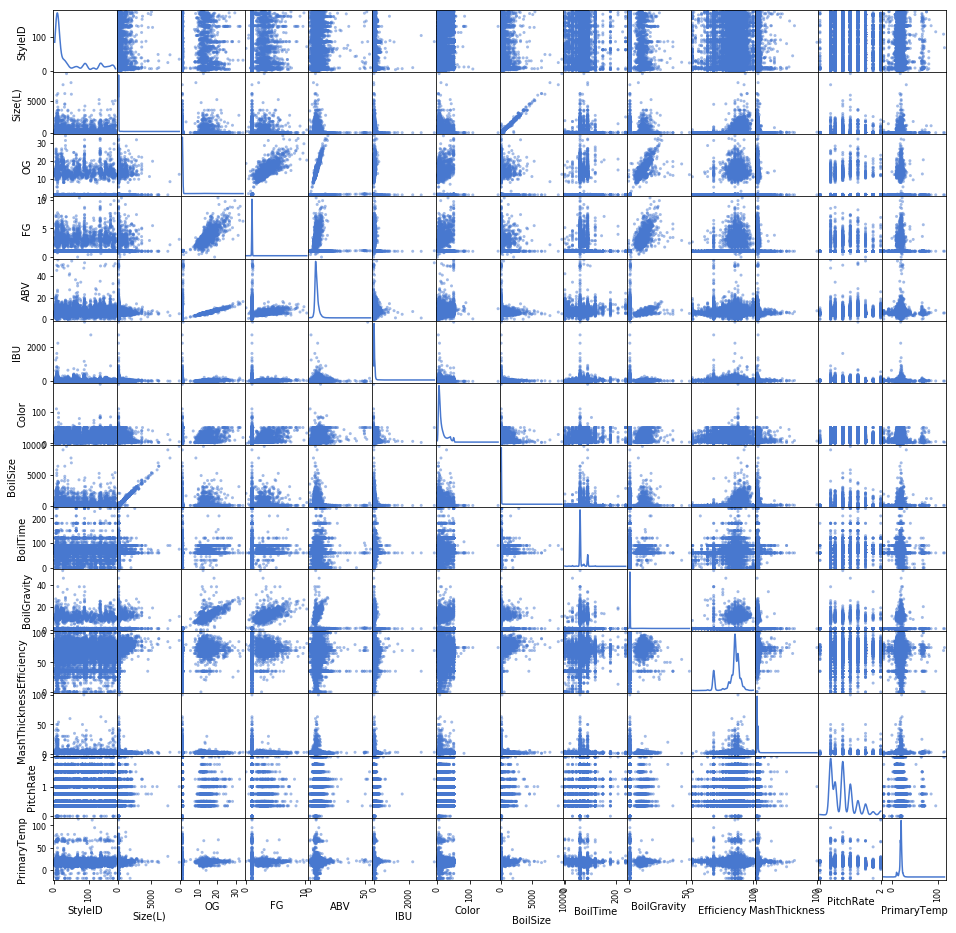

In [332]:
#This takes some time to load.
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(16, 16));

<div style="font-size:16px; color:darkblue;">
    Scatter plots and heat maps to see correlations in data.
</div>

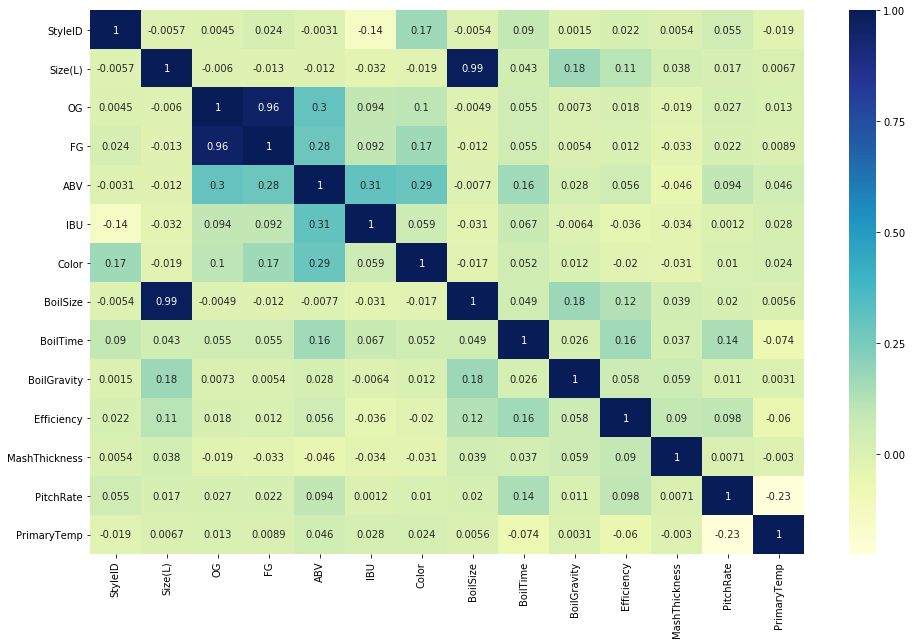

In [305]:
plt.subplots(figsize=(16, 10))
sns.heatmap(dfClean.corr(), annot=True, cmap="YlGnBu")
plt.show()

<div style="font-size:16px; color:darkblue;">
    Common Styles.
</div>

Style
American IPA            16.403803
American Pale Ale       10.415178
Saison                   3.595373
American Light Lager     3.128263
American Amber Ale       2.799912
Blonde Ale               2.406990
Imperial IPA             2.030554
American Stout           1.742045
Irish Red Ale            1.654119
American Brown Ale       1.582678
Name: Name, dtype: float64


Text(0.5,1,'% Frequency of top 10 styles in data')

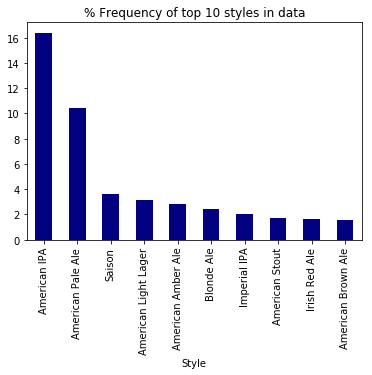

In [306]:
top_10_styles = dfClean.groupby('Style').count()['Name'].sort_values(ascending=False)[0:10]
top_10_styles = 100 * (top_10_styles/len(dfClean))
print(top_10_styles)
top_10_styles.plot.bar(x='Style', y='% Frequency', color='navy')
plt.title('% Frequency of top 10 styles in data')

Text(0.5,1,'% Frequency of top 10 general styles in data')

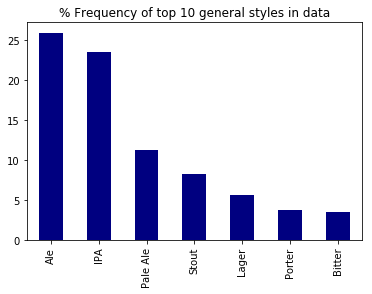

In [307]:
general_styles = ['Ale', 'IPA', 'Pale Ale', 'Lager', 'Stout', 'Bitter', 'Porter']
top_10_general_styles = pd.Series()
for style in general_styles:
    top_10_general_styles = top_10_general_styles.append(pd.Series(
        {style: dfClean['Style'].str.contains(style).sum()}))

top_10_general_styles = top_10_general_styles.sort_values(ascending=False)[0:10]
top_10_general_styles = 100 * (top_10_general_styles/len(dfClean))
top_10_general_styles.plot.bar(x='General Style', y='% Frequency', color='navy')
plt.title('% Frequency of top 10 general styles in data')

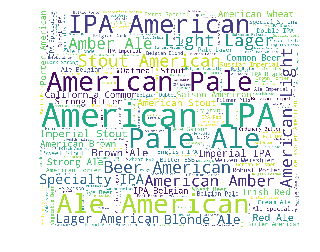

In [308]:
wordcloud_style = wordcloud.WordCloud(background_color='white',
                                      width=1200,height=1000).generate(' '.join(dfClean['Style']))


plt.imshow(wordcloud_style)
plt.axis('off')
plt.show()

<div style="font-size:16px; color:darkblue;">
    General distributions.
</div>

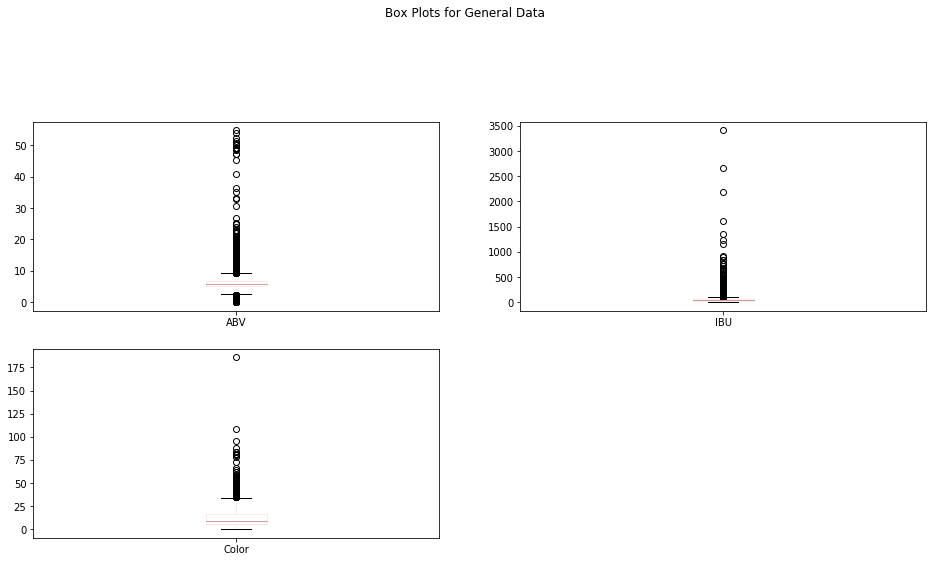

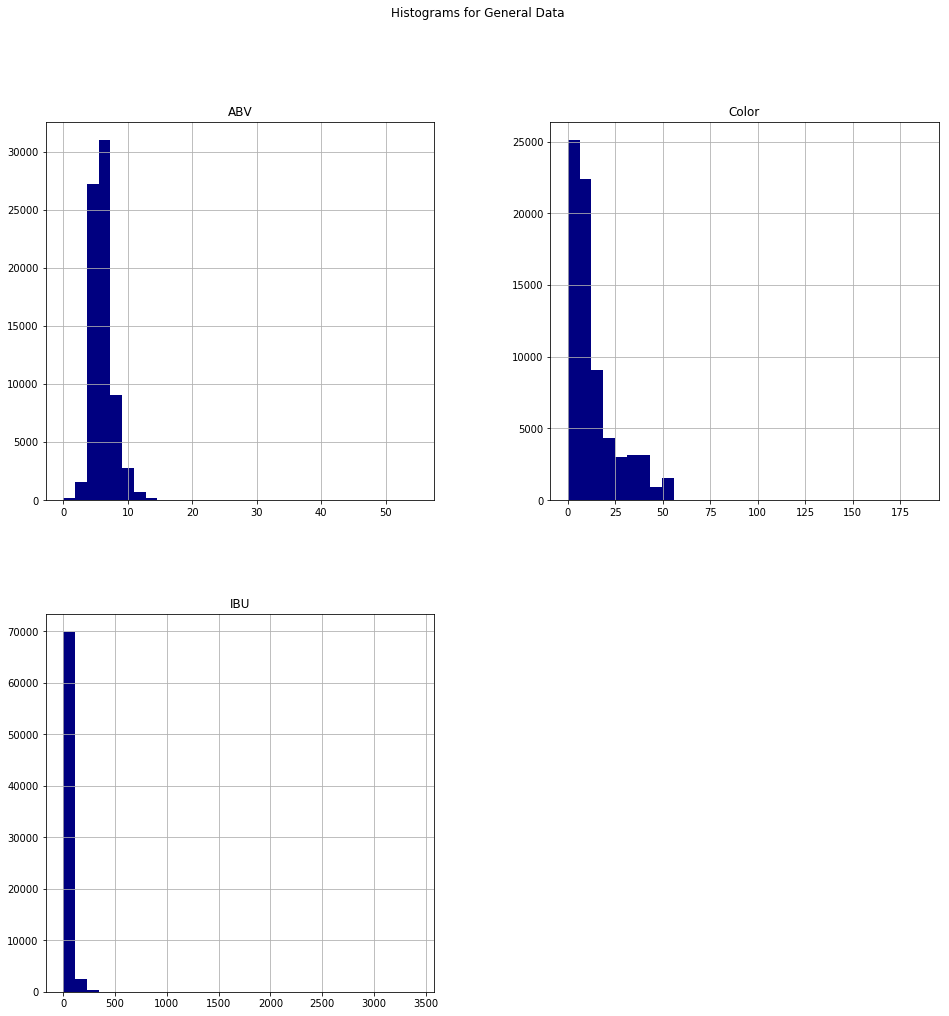

In [309]:
dfNumeric = dfClean[['ABV', 'IBU', 'Color']]
dfNumeric.plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False, figsize=(16,16), 
               title='Box Plots for General Data')
dfNumeric.hist(bins=30, figsize=(16,16), color='navy')
plt.suptitle('Histograms for General Data')
plt.show()

<div style="font-size:16px; color:darkblue;">
    Individual style disributions.
</div>

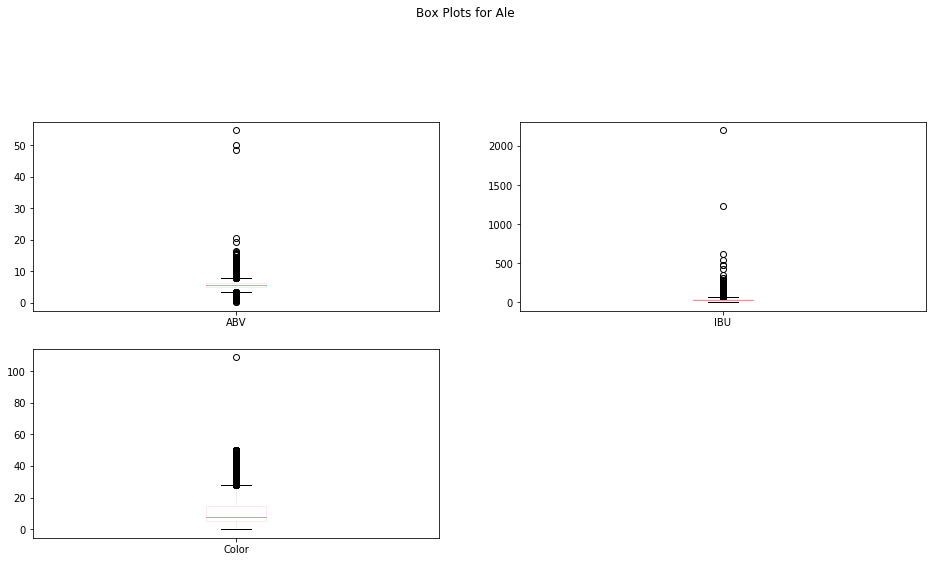

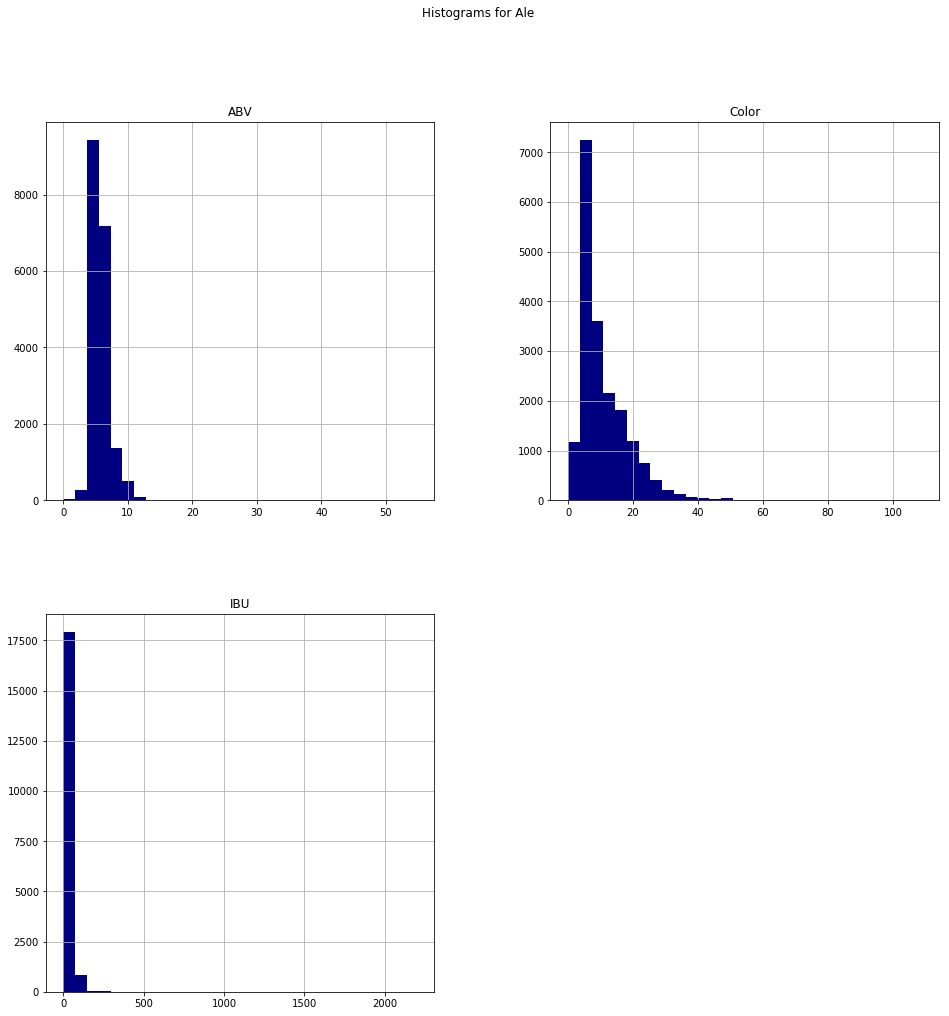

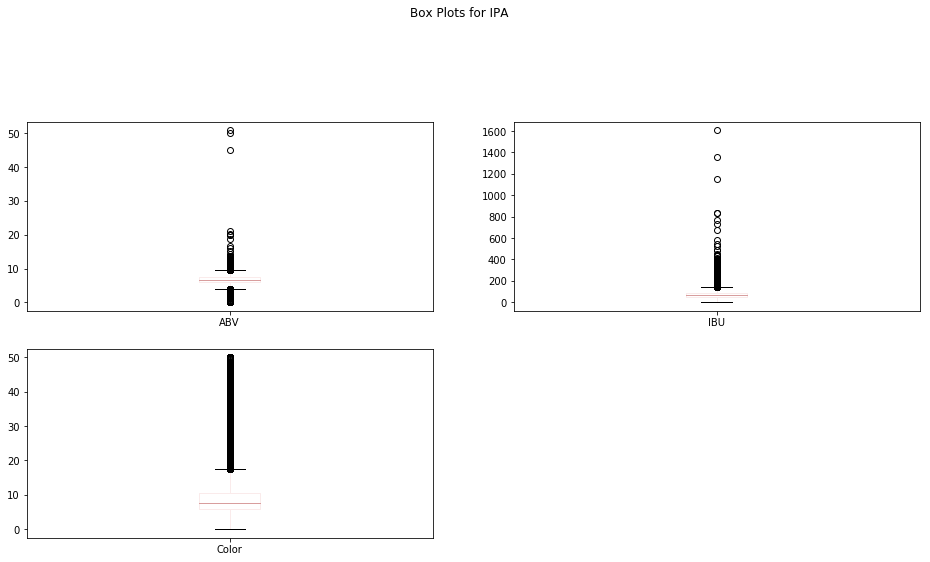

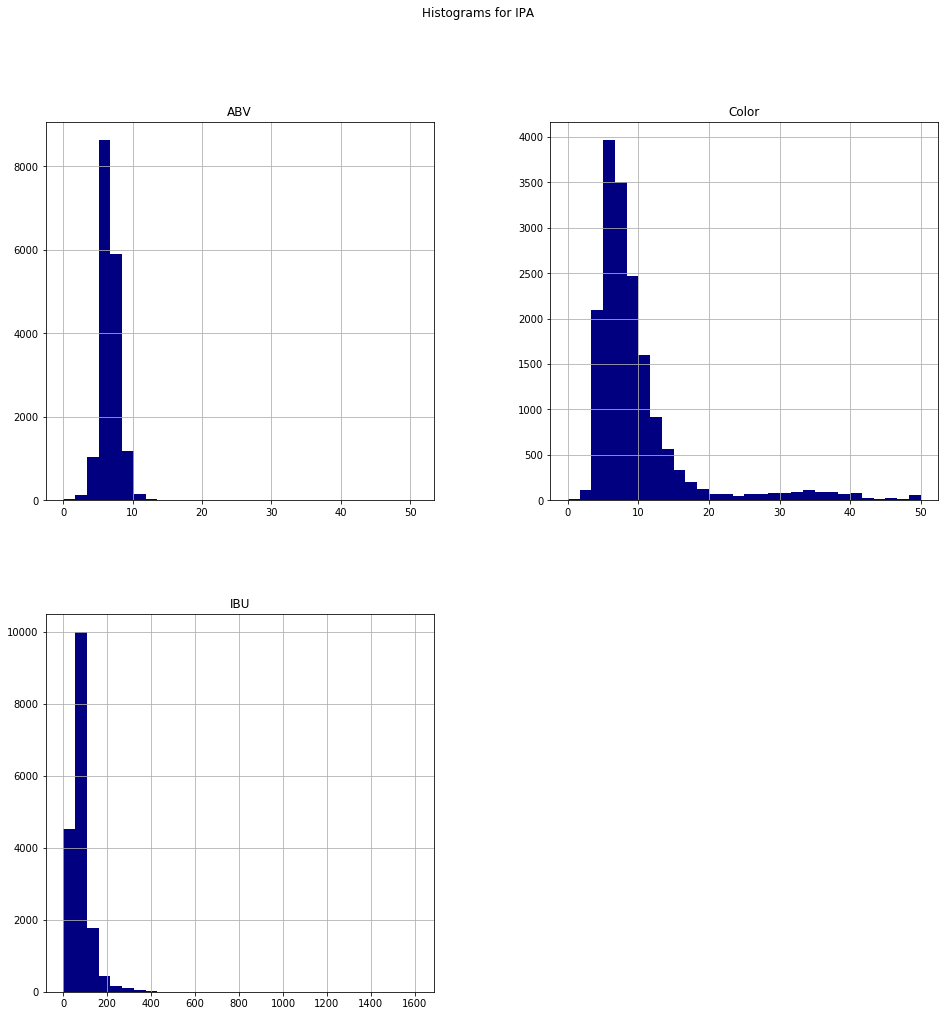

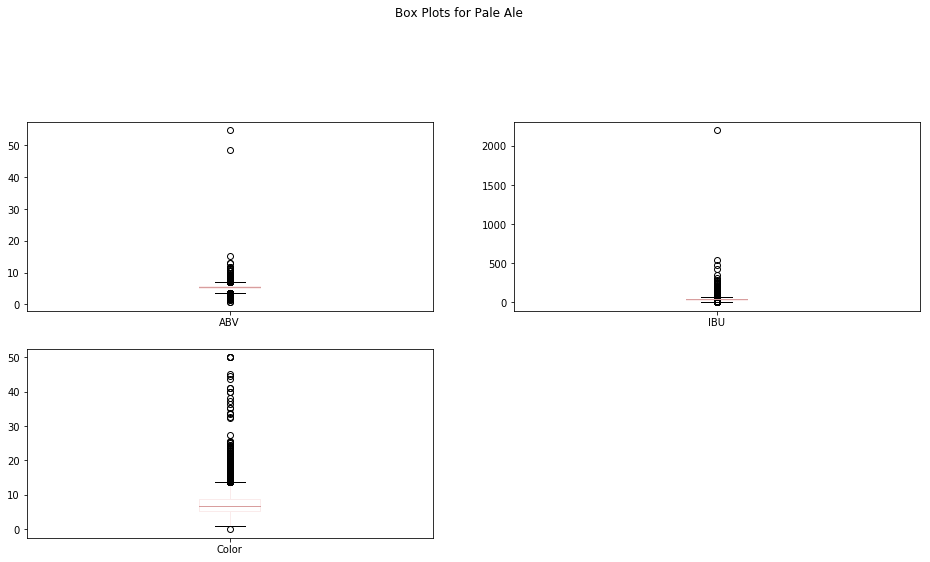

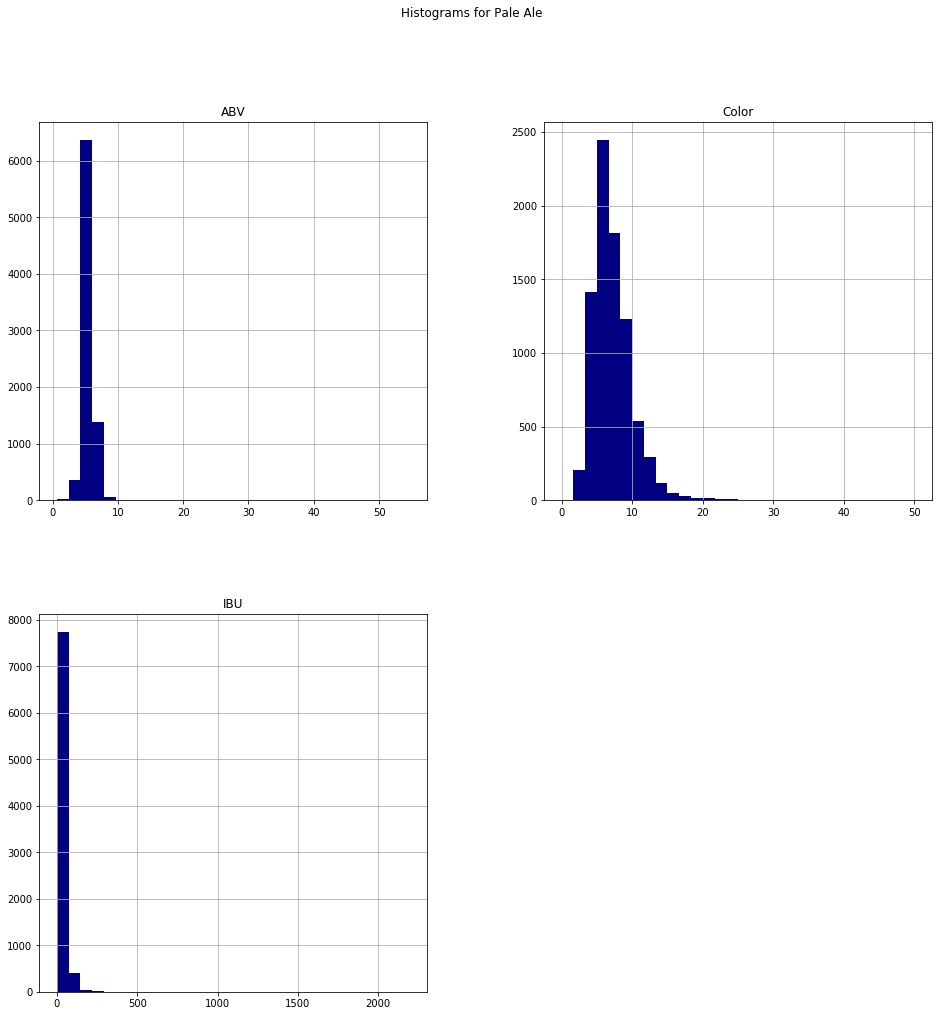

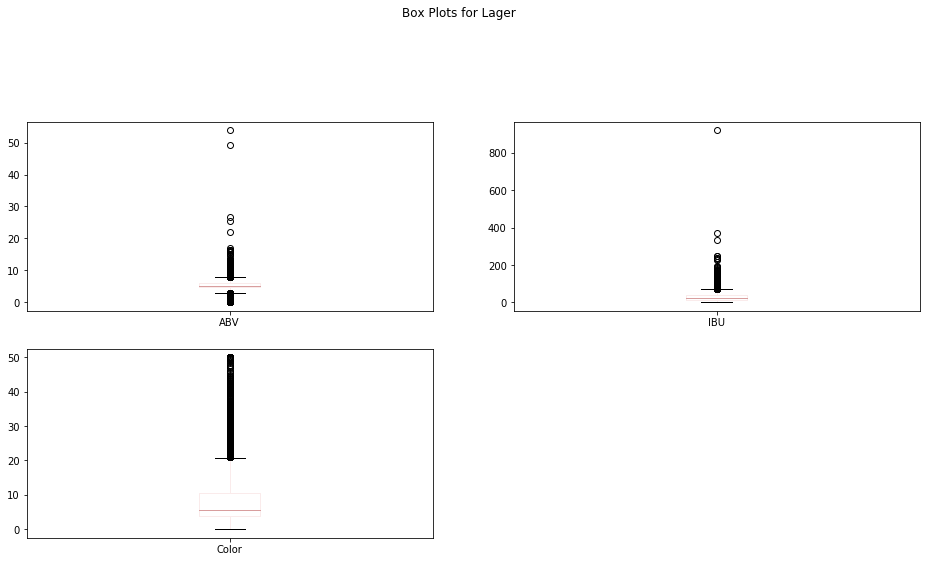

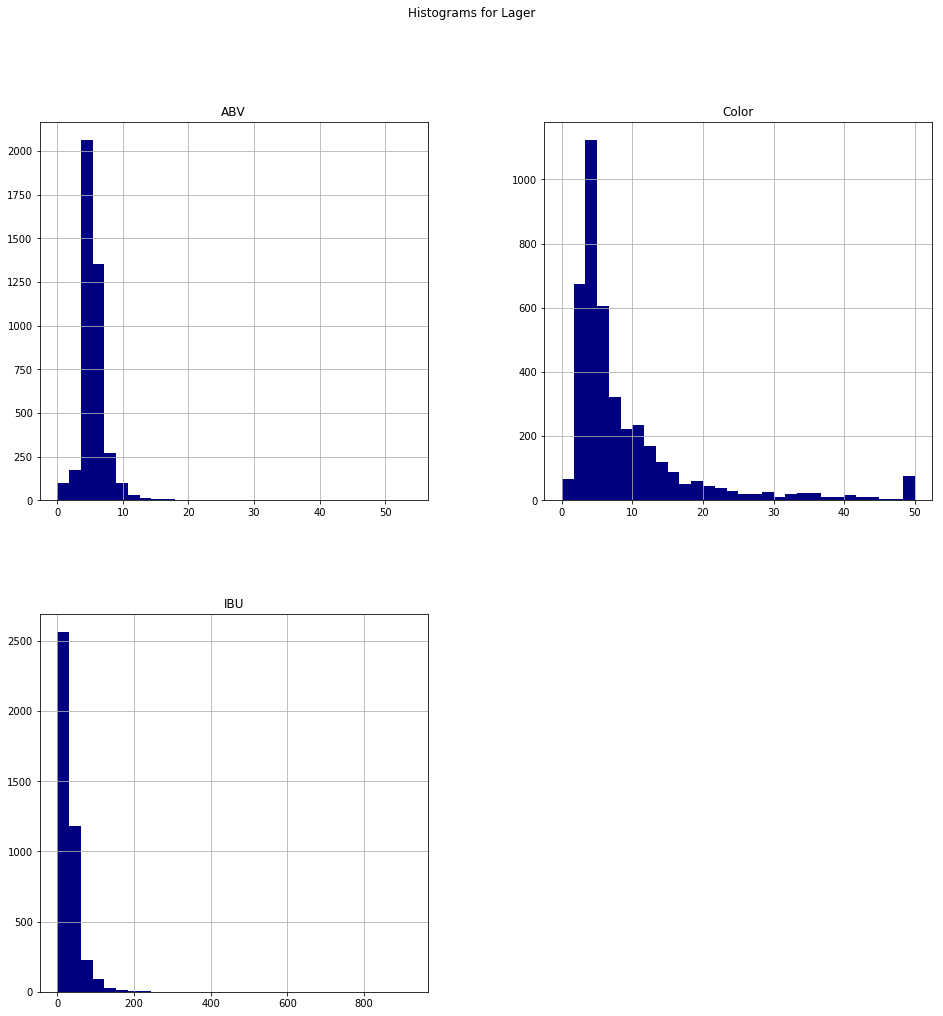

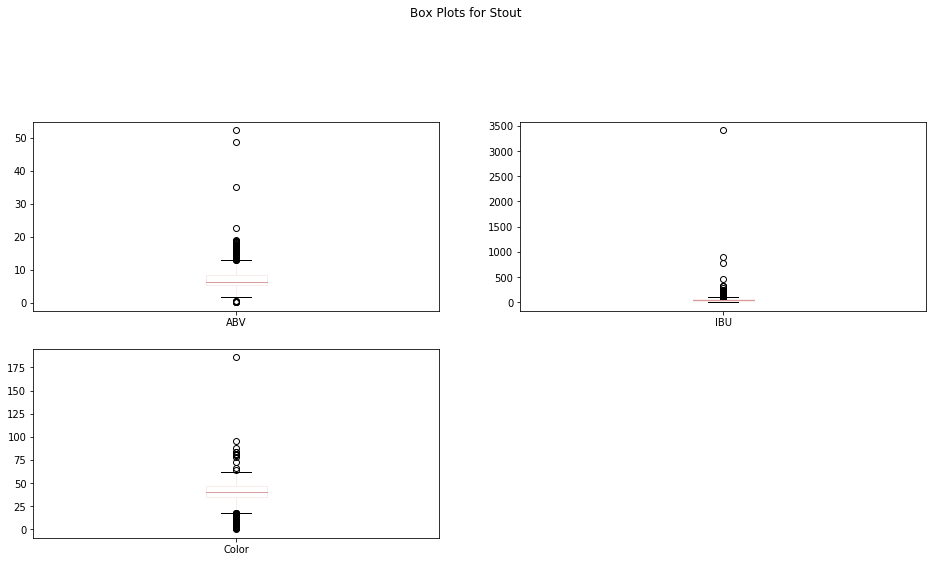

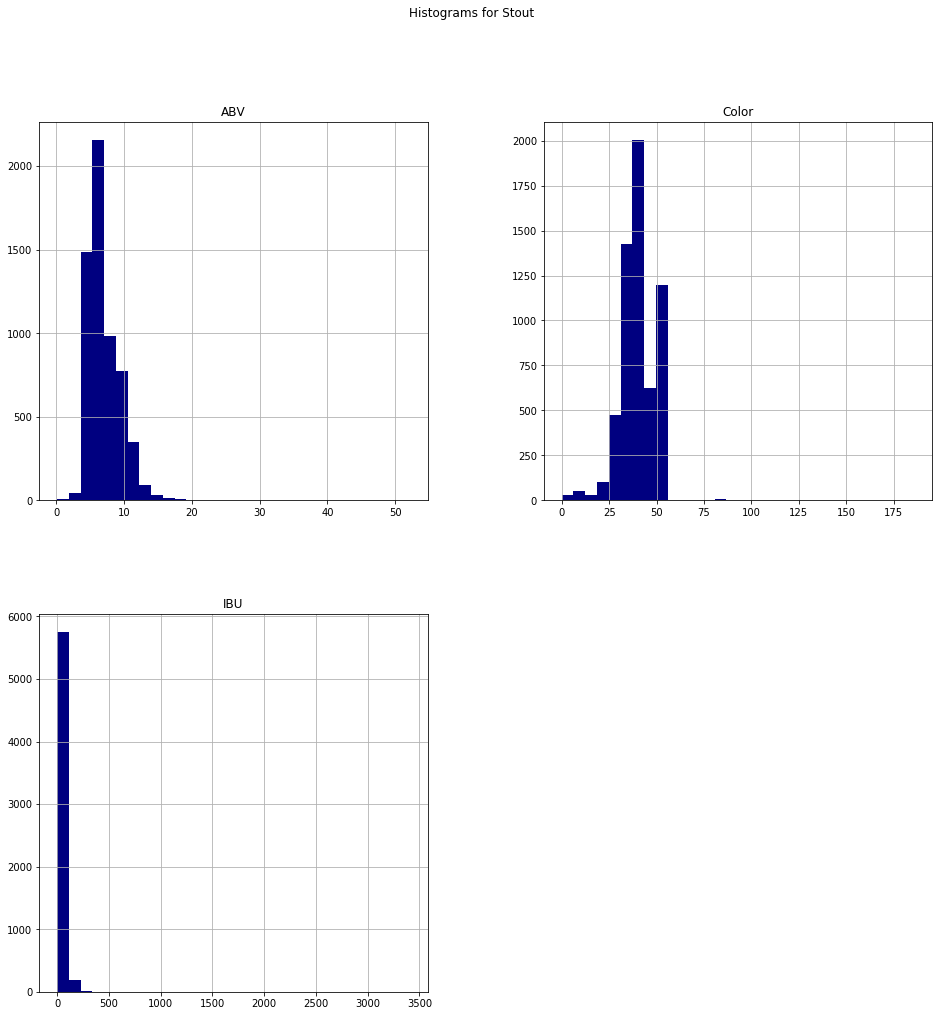

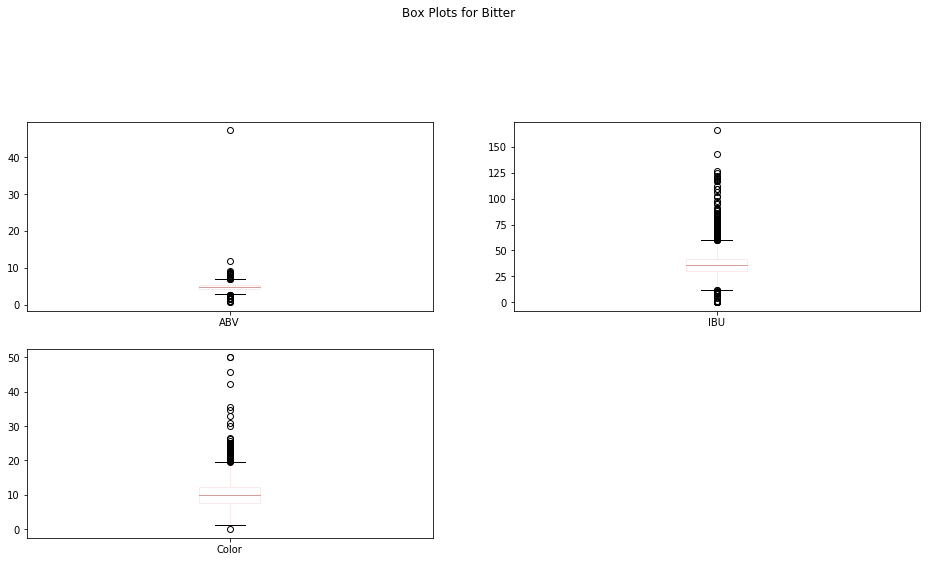

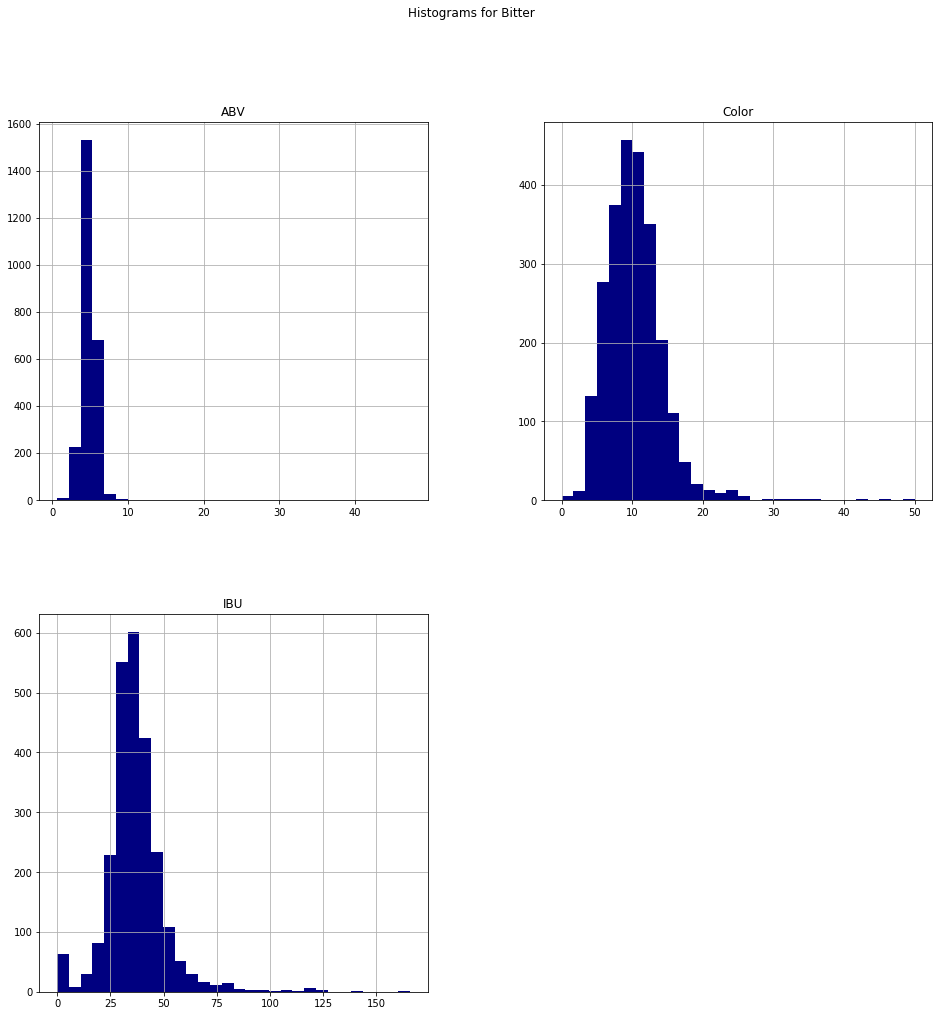

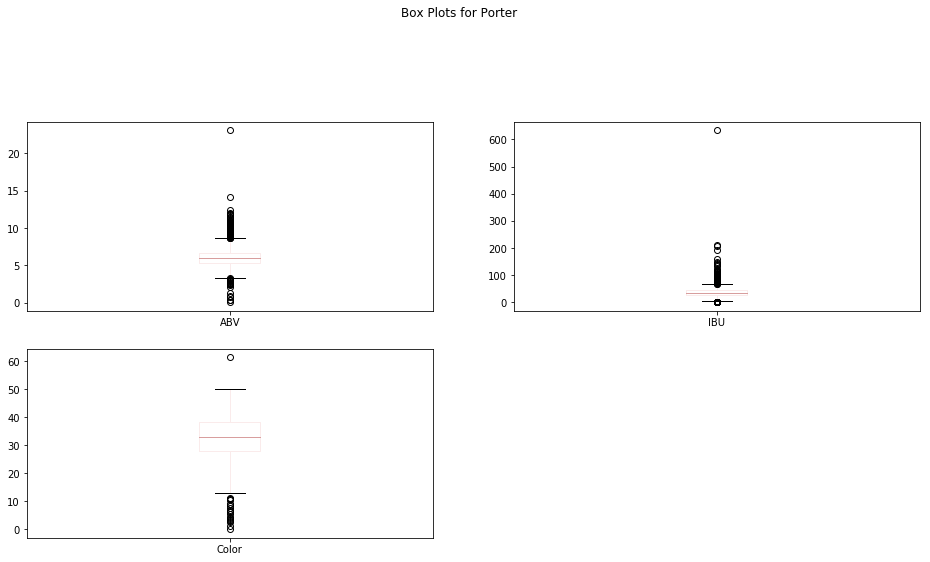

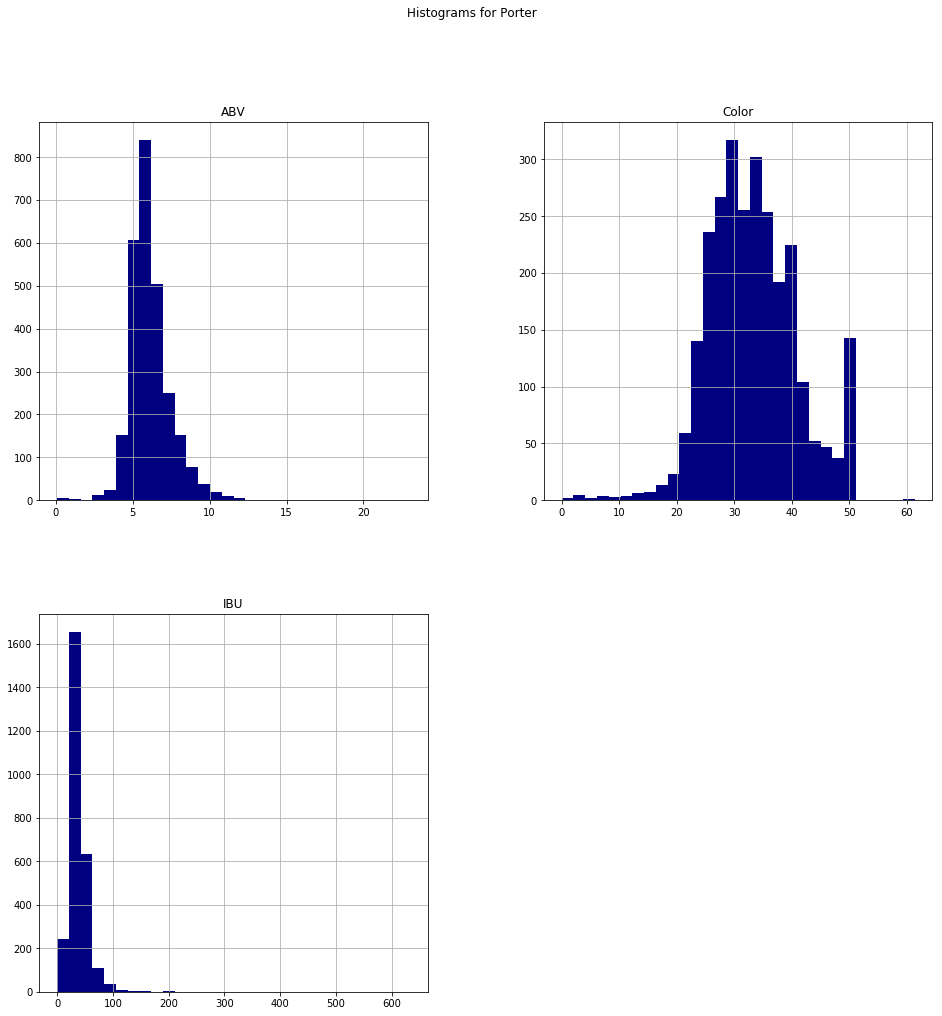

In [310]:
dfStyleAndNumeric = dfClean[['Style', 'ABV', 'IBU', 'Color']]

general_styles = ['Ale', 'IPA', 'Pale Ale', 'Lager', 'Stout', 'Bitter', 'Porter']

for style in general_styles:
    dfForStyle = dfStyleAndNumeric[dfStyleAndNumeric['Style'].str.contains(style)]
    dfForStyle.plot(kind='box', subplots=True, layout=(4,2), sharex=False,
                    sharey=False, figsize=(16,16), title='Box Plots for {}'.format(style))
    dfForStyle.hist(bins=30, figsize=(16,16), color='navy')
    plt.suptitle('Histograms for {}'.format(style))
    plt.show()

In [311]:
dfStyleAndNumeric = dfClean[['Style', 'ABV', 'IBU', 'Color']]

general_styles = ['Ale', 'IPA', 'Pale Ale', 'Lager', 'Stout', 'Bitter', 'Porter']

for style in general_styles:
    print('Stats for {}'.format(style))
    print(dfStyleAndNumeric[dfStyleAndNumeric['Style'].str.contains(style)].describe())

Stats for Ale
                ABV           IBU         Color
count  18858.000000  18858.000000  18858.000000
mean       5.776540     37.165129     10.664981
std        1.468516     28.990633      7.408094
min        0.060000      0.000000      0.000000
25%        4.990000     24.410000      5.310000
50%        5.500000     34.010000      7.980000
75%        6.160000     44.177500     14.410000
max       54.720000   2197.070000    108.650000
Stats for IPA
                ABV           IBU         Color
count  17064.000000  17064.000000  17064.000000
mean       6.706668     76.712765      9.849520
std        1.397430     50.072863      7.356278
min        0.000000      0.000000      0.000000
25%        5.960000     52.507500      5.950000
50%        6.580000     67.205000      7.710000
75%        7.350000     88.740000     10.562500
max       50.860000   1605.830000     50.000000
Stats for Pale Ale
               ABV          IBU        Color
count  8206.000000  8206.000000  8206.000000

In [312]:
dfGeneralStyles = dfClean[dfClean['Style'].str.contains('|'.join(general_styles))]
for style in general_styles:
    dfGeneralStyles.loc[dfGeneralStyles['Style'].str.contains(style), 'Style'] = style

C:\Users\megha\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


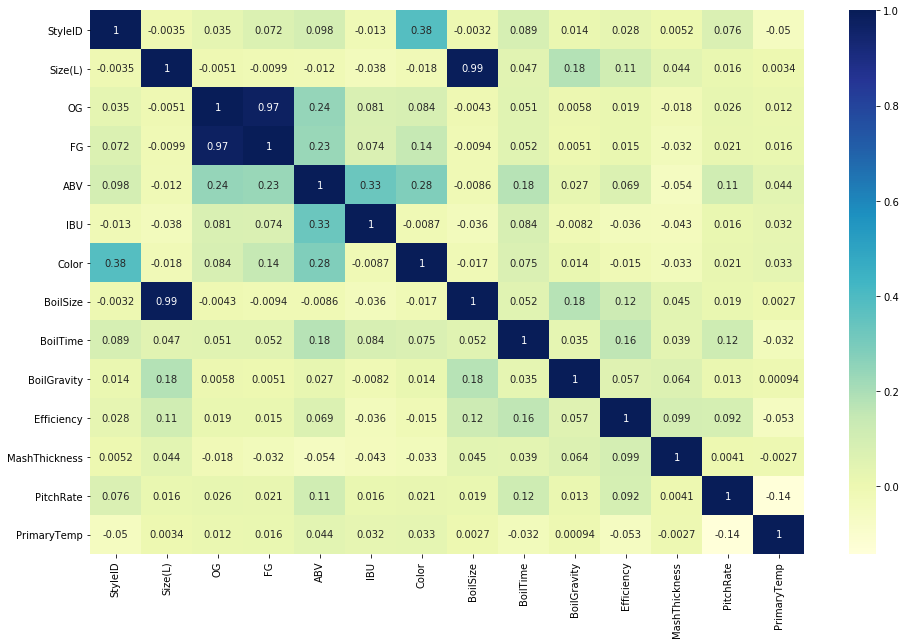

In [333]:
plt.subplots(figsize=(16, 10))
sns.heatmap(dfGeneralStyles.corr(), annot=True, cmap="YlGnBu")
plt.show()

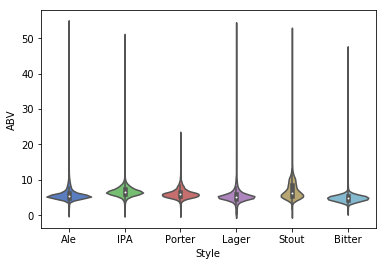

In [325]:
sns.violinplot(x='Style', y='ABV',data=dfGeneralStyles, figsize=(16,16))
plt.show()

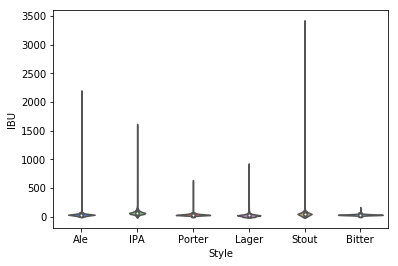

In [326]:
sns.violinplot(x='Style', y='IBU',data=dfGeneralStyles, figsize=(16,16))
plt.show()

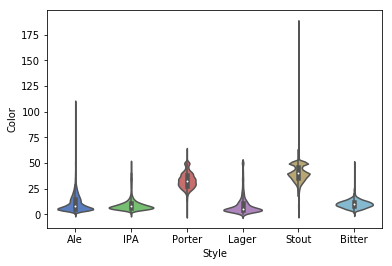

In [327]:
sns.violinplot(x='Style', y='Color',data=dfGeneralStyles, figsize=(16,16))
plt.show()

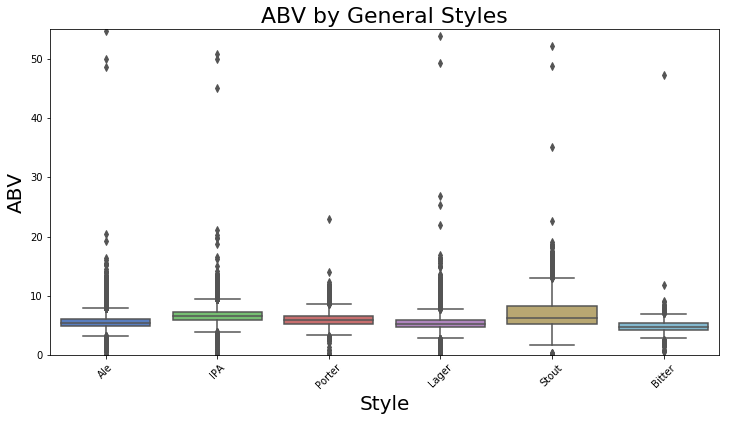

In [331]:
order = dfGeneralStyles.groupby('Style')['ABV'].median().fillna(0).sort_values()[::-1].index
plt.figure(figsize=(12,6))
sns.boxplot(dfGeneralStyles['Style'], dfGeneralStyles['ABV'])
plt.xticks(rotation=45)
plt.ylim(0,55)
plt.title('ABV by General Styles', fontsize=22)
plt.xlabel('Style', fontsize=20)
plt.ylabel('ABV', fontsize=20)
plt.show()

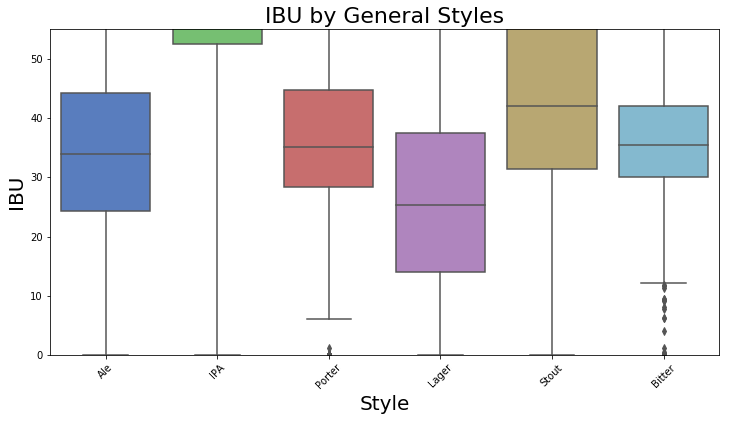

In [329]:
order = dfGeneralStyles.groupby('Style')['IBU'].median().fillna(0).sort_values()[::-1].index

plt.figure(figsize=(12,6))
sns.boxplot(dfGeneralStyles['Style'], dfGeneralStyles['IBU'])
plt.xticks(rotation=45)
plt.ylim(0,55)
plt.title('IBU by General Styles', fontsize=22)
plt.xlabel('Style', fontsize=20)
plt.ylabel('IBU', fontsize=20)
plt.show()

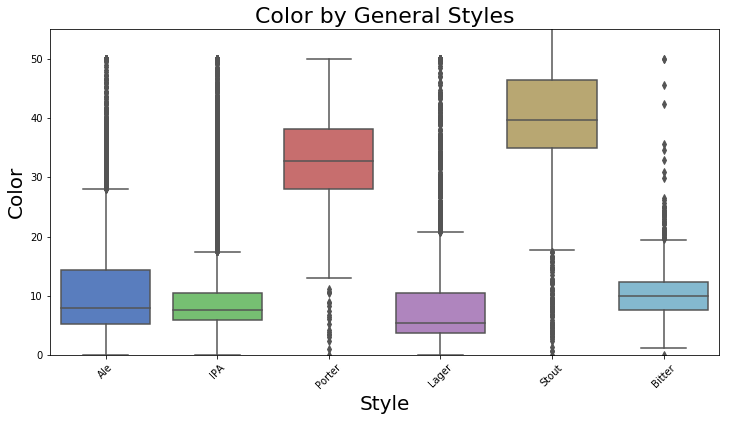

In [330]:
order = dfGeneralStyles.groupby('Style')['Color'].median().fillna(0).sort_values()[::-1].index

plt.figure(figsize=(12,6))
sns.boxplot(dfGeneralStyles['Style'], dfGeneralStyles['Color'])
plt.xticks(rotation=45)
plt.ylim(0,55)
plt.title('Color by General Styles', fontsize=22)
plt.xlabel('Style', fontsize=20)
plt.ylabel('Color', fontsize=20)
plt.show()

<div style="font-size:16px; color:darkblue;">
    IPA Analysis<br/>
    Due to the common roots of IPA beers (https://en.wikipedia.org/wiki/India_pale_ale) we expect a strong correlation between the IPA styles for different attributes. We picked American and American Pale Ale as an example, but the analysis could apply to other IPAs as well. We want to investigate if the data is supporting the common root of the IPA beer family.
</div>

In [117]:
dfClean['OG-FG']=dfClean['OG']-dfClean['FG']

In [118]:
dfClean.head(5)

Name                               Style  \
0                Vanilla Cream Ale                           Cream Ale   
1      Southern Tier Pumking clone  Holiday/Winter Special Spiced Beer   
2      Zombie Dust Clone - EXTRACT                        American IPA   
3    Zombie Dust Clone - ALL GRAIN                        American IPA   
4  Bakke Brygg Belgisk Blonde 50 l                   Belgian Blond Ale   

   StyleID  Size(L)     OG     FG   ABV    IBU  Color  BoilSize  BoilTime  \
0       45    21.77  1.055  1.013  5.48  17.65   4.83     28.39        75   
1       85    20.82  1.083  1.021  8.16  60.65  15.64     24.61        60   
2        7    18.93  1.063  1.018  5.91  59.25   8.98     22.71        60   
3        7    22.71  1.061  1.017  5.80  54.48   8.50     26.50        60   
4       20    50.00  1.060  1.010  6.48  17.84   4.57     60.00        90   

   BoilGravity  Efficiency  MashThickness        SugarScale BrewMethod  \
0        1.038        70.0            1.5  Specific Gravity  All Grain   
1        1.070        70.0            1.5  Specific Gravity  All Grain   
2        1.047        70.0            1.5  Specific Gravity    extract   
3        1.047        70.0            1.5  Specific Gravity  All Grain   
4        1.050        72.0            1.5  Specific Gravity  All Grain   

   PitchRate  PrimaryTemp  OG-FG  
0       0.75        17.78  0.042  
1       0.75        20.00  0.062  
2       0.75        20.00  0.045  
3       0.75        20.00  0.044  
4       0.75        19.00  0.050

In [119]:
df1 = dfClean[dfClean['Style']=='American IPA']
df2 = dfClean[dfClean['Style']=='American Pale Ale']
dfcp = pd.concat([df1, df2])

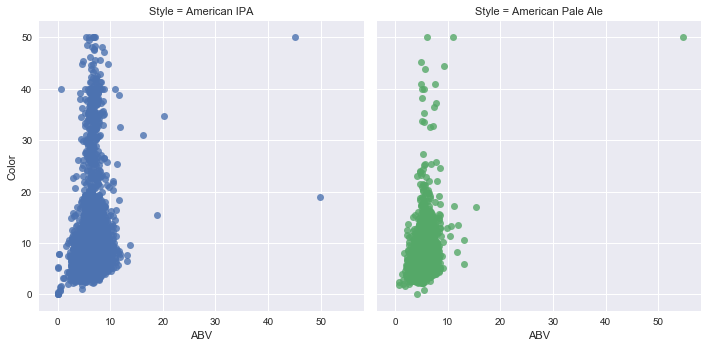

In [120]:
sns.set(color_codes=True)
sns.lmplot(x='ABV', y='Color', data=dfcp, hue='Style', fit_reg = False, col='Style')

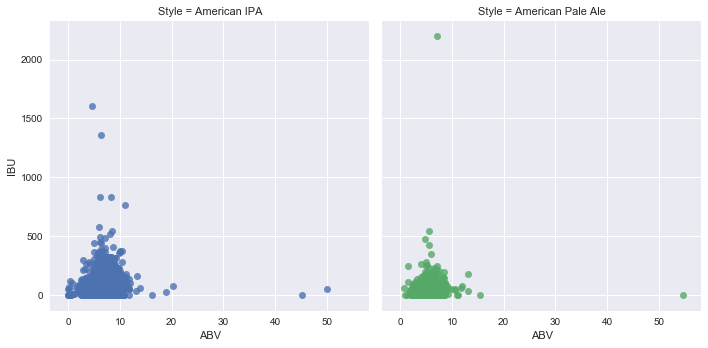

In [121]:
sns.lmplot(x='ABV', y='IBU', data=dfcp, hue='Style', fit_reg = False, col='Style')

In [122]:
dfcp['OG-FG'].describe()
outlier = dfcp['OG-FG'].mean() + 5*dfcp['OG-FG'].std()
dfcp = dfcp[dfcp['OG-FG'] < outlier]

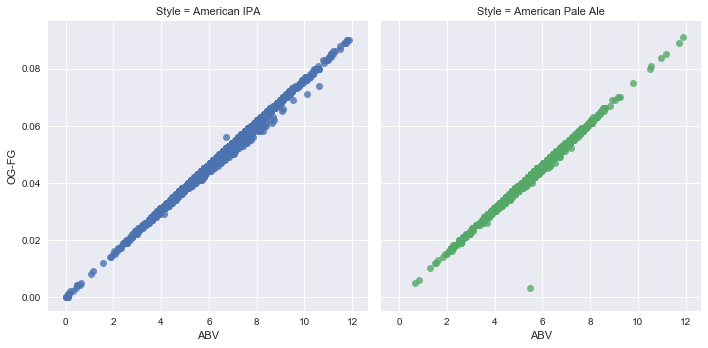

In [123]:
sns.lmplot(x='ABV', y='OG-FG', data=dfcp, hue='Style', fit_reg = False, col='Style')

<div style="font-size:16px; color:darkblue;">
    Comparison of different style classification models.
</div>

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    dfClean[['OG', 'ABV', 'IBU', 'Color']], dfClean['StyleID'], random_state=0)

In [146]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.21
Accuracy of Logistic regression classifier on test set: 0.21


In [147]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.22


In [148]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.45
Accuracy of K-NN classifier on test set: 0.28


In [149]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.26
Accuracy of LDA classifier on test set: 0.26


In [150]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.27
Accuracy of GNB classifier on test set: 0.27


In [151]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.40
Accuracy of SVM classifier on test set: 0.33
